In [3]:
import json
import math
import pandas as pd
import numpy as np

In [13]:
path = "./PPMI_ClinicalData/"

# Age and Gender

In [3]:
pdrand = pd.read_csv(path+"Randomization_table.csv")
print(len(pdrand))
pdrand.head()

1921


,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,ENROLLDT,BIRTHDT,GENDER,CONSNTDT,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,231719101,S,3403,RANDOM,RANDOM,NaN,07/2010,08/1941,2.0,06/2010,07/2010,2020-06-29 14:40:45.0,NaN,07/2010
1,234854501,S,3404,RANDOM,RANDOM,NaN,07/2010,08/1954,1.0,06/2010,07/2010,2020-06-29 14:41:42.0,NaN,07/2010
2,232556601,S,3401,RANDOM,RANDOM,NaN,07/2010,03/1954,1.0,06/2010,07/2010,2020-06-29 14:40:25.0,NaN,07/2010
3,233161001,S,3400,RANDOM,RANDOM,NaN,07/2010,05/1971,1.0,06/2010,07/2010,2020-06-29 14:40:02.0,NaN,07/2010
4,238250201,S,3405,RANDOM,RANDOM,NaN,07/2010,01/1947,1.0,07/2010,08/2010,2020-01-13 15:16:51.0,NaN,08/2010


In [35]:
randomization = pd.DataFrame(columns = ["PATNO", "GENDER", "ENROLLDT", "AGE"])

for i in range(len(pdrand)):
    
    patno = pdrand["PATNO"][i]
    
    gender = pdrand["GENDER"][i]
    if(pd.isna(gender) == True):
        print(i, patno, "SKIPPING DUE TO INCOMPLETE DATA")
        continue
    gender = int(gender)
    if(gender == 2):
        gender = 1
    else:
        gender = 0
        
    enrolldate = pdrand["ENROLLDT"][i].split("/")
    enrolldate_month = int(enrolldate[0])
    enrolldate_year = int(enrolldate[1])
    birthdate = pdrand["BIRTHDT"][i].split("/")
    birthdate_month = int(birthdate[0])
    birthdate_year = int(birthdate[1])
    age = enrolldate_year - birthdate_year
    if(enrolldate_month - birthdate_month < 0):
        age -= 1
        
    tempdict = dict()
    tempdict["PATNO"] = patno
    tempdict["GENDER"] = gender
    tempdict["ENROLLDT"] = pdrand["ENROLLDT"][i]
    tempdict["AGE"] = age
    
    randomization = randomization.append(tempdict, ignore_index = True)
    
randomization.head()

731 4080 SKIPPING DUE TO INCOMPLETE DATA
1357 3204 SKIPPING DUE TO INCOMPLETE DATA
1744 3155 SKIPPING DUE TO INCOMPLETE DATA
1919 3306 SKIPPING DUE TO INCOMPLETE DATA


,PATNO,GENDER,ENROLLDT,AGE
0,3403,1,07/2010,68
1,3404,0,07/2010,55
2,3401,0,07/2010,56
3,3400,0,07/2010,39
4,3405,0,07/2010,63


In [36]:
print(len(randomization))

1917


# Race

In [37]:
pdscreen = pd.read_csv(path+"Screening___Demographics.csv")
print(len(pdscreen))
pdscreen.head()

2254


,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,SIGNCNST,CONSNTDT,APPRDX,CURRENT_APPRDX,P3GRP,...,PRJENRDT,REFERRAL,DECLINED,RSNDEC,EXCLUDED,RSNEXC,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,224392801,S,3400,CONSENT,SCREEN,1.0,06/2010,1.0,1.0,NaN,...,07/2010,60.0,NaN,NaN,NaN,NaN,06/2010,2020-06-29 14:40:01.0,NaN,07/2010
1,224394301,S,3401,CONSENT,SCREEN,1.0,06/2010,2.0,2.0,NaN,...,07/2010,1.0,NaN,NaN,NaN,NaN,06/2010,2020-06-29 14:40:25.0,NaN,07/2010
2,224398401,S,3402,CONSENT,SCREEN,1.0,06/2010,3.0,3.0,NaN,...,10/2011,1.0,NaN,NaN,NaN,NaN,06/2010,2020-06-29 14:49:45.0,NaN,07/2010
3,224400201,S,3403,CONSENT,SCREEN,1.0,06/2010,1.0,1.0,NaN,...,07/2010,1.0,NaN,NaN,NaN,NaN,06/2010,2020-06-29 14:40:44.0,NaN,07/2010
4,224718101,S,3404,CONSENT,SCREEN,1.0,06/2010,2.0,2.0,NaN,...,07/2010,1.0,NaN,NaN,NaN,NaN,06/2010,2020-06-29 14:41:41.0,NaN,07/2010


In [38]:
screening_demo = pd.DataFrame(columns = ["PATNO", "HISPLAT", "RAINDALS", "RAASIAN", "RABLACK", "RAHAWOPI", 
                                                 "RAWHITE", "RANOS"])

for i in range(len(pdscreen)):
    
    tempdict = dict()
    tempdict["PATNO"] = pdscreen["PATNO"][i]
    tempdict["HISPLAT"] = pdscreen["HISPLAT"][i]
    tempdict["RAINDALS"] = pdscreen["RAINDALS"][i]
    tempdict["RAASIAN"] = pdscreen["RAASIAN"][i]
    tempdict["RABLACK"] = pdscreen["RABLACK"][i]
    tempdict["RAHAWOPI"] = pdscreen["RAHAWOPI"][i]
    tempdict["RAWHITE"] = pdscreen["RAWHITE"][i]
    tempdict["RANOS"] = pdscreen["RANOS"][i]
    
    screening_demo = screening_demo.append(tempdict, ignore_index = True)
    
screening_demo.head()

,PATNO,HISPLAT,RAINDALS,RAASIAN,RABLACK,RAHAWOPI,RAWHITE,RANOS
0,3400.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3401.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3402.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3403.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3404.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [39]:
print(len(screening_demo))

2254


# FAMILY PD History

In [5]:
pdfam = pd.read_csv(path+"Family_History__PD_.csv")
print(len(pdfam))
pdfam.head()

2173


,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,BIOMOM,BIOMOMPD,BIODAD,BIODADPD,...,MATAU,MATAUPD,PATAU,PATAUPD,KIDSNUM,KIDSPD,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,408735501,S,10362,SC,FAMHXPD,08/2013,1,1.0,1.0,0.0,...,2.0,1.0,8.0,0.0,2.0,0.0,08/2013,2020-02-11 15:26:24.0,NaN,08/2013
1,605744101,S,10405,SC,FAMHXPD,09/2014,1,0.0,1.0,0.0,...,0.0,NaN,2.0,1.0,1.0,0.0,12/2016,2020-02-11 15:22:36.0,NaN,12/2016
2,411028901,S,10496,SC,FAMHXPD,06/2013,1,0.0,1.0,0.0,...,4.0,0.0,4.0,0.0,2.0,0.0,09/2013,2020-02-12 11:27:56.0,NaN,09/2013
3,409586801,S,10606,SC,FAMHXPD,08/2013,1,0.0,1.0,0.0,...,0.0,NaN,0.0,NaN,3.0,0.0,09/2013,2015-06-26 11:20:16.0,NaN,03/2015
4,448229801,S,10662,SC,FAMHXPD,06/2014,1,0.0,1.0,0.0,...,9.0,0.0,4.0,0.0,0.0,NaN,07/2014,2020-02-11 15:22:46.0,NaN,07/2014


In [6]:
patno_pdfam = []
for i in range(len(pdfam)):
    if(pdfam["PATNO"][i] not in patno_pdfam):
        patno_pdfam.append(pdfam["PATNO"][i])

print("Number of Patients:", len(patno_pdfam))

Number of Patients: 2154


In [7]:
pdfam.columns

Index(['REC_ID', 'F_STATUS', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT',
       'BIOMOM', 'BIOMOMPD', 'BIODAD', 'BIODADPD', 'FULSIB', 'FULSIBPD',
       'HAFSIB', 'HAFSIBPD', 'MAGPAR', 'MAGPARPD', 'PAGPAR', 'PAGPARPD',
       'MATAU', 'MATAUPD', 'PATAU', 'PATAUPD', 'KIDSNUM', 'KIDSPD',
       'ORIG_ENTRY', 'LAST_UPDATE', 'QUERY', 'SITE_APRV'],
      dtype='object')

In [9]:
fam_history = pd.DataFrame(columns = ["PATNO", "First_Fam_Num", "First_Fam_PD", "Other_Fam_Num", "Other_Fam_PD"])

lentot = len(patno_pdfam)
len1 = len(pdfam)
columns = list(pdfam.columns)

for i in range(lentot):
    
    if(i%100 == 0):
        print(i)
    
    patno = patno_pdfam[i]
    
    count1 = 0
    total1 = np.zeros(4)
        
    for j in range(len1):
        
        patnoj = pdfam["PATNO"][j]
        if(patnoj != patno):
            continue
            
        count1 +=1
        
        for x in ['BIOMOM', 'BIOMOMPD', 'BIODAD', 'BIODADPD', 'FULSIB', 'FULSIBPD', 'HAFSIB', 'HAFSIBPD', 
                  'MAGPAR', 'MAGPARPD', 'PAGPAR', 'PAGPARPD', 'MATAU', 'MATAUPD', 'PATAU', 
                  'PATAUPD', 'KIDSNUM', 'KIDSPD']:
            val = pdfam[x][j]
            if(pd.isna(val) == True):
                pdfam[x][j] = 0
            else:
                pdfam[x][j] = int(val)
                
        val1 = pdfam["BIOMOM"][j]+pdfam["BIODAD"][j]+pdfam["FULSIB"][j]+pdfam["HAFSIB"][j]+pdfam["KIDSNUM"][j]
        val2 = pdfam["BIOMOMPD"][j]+pdfam["BIODADPD"][j]+pdfam["FULSIBPD"][j]+pdfam["HAFSIBPD"][j]+pdfam["KIDSPD"][j]
        val3 = pdfam["MAGPAR"][j]+pdfam["PAGPAR"][j]+pdfam["MATAU"][j]+pdfam["PATAU"][j]
        val4 = pdfam["MAGPARPD"][j]+pdfam["PAGPARPD"][j]+pdfam["MATAUPD"][j]+pdfam["PATAUPD"][j]
        
        total1[0] += val1
        total1[1] += val2
        total1[2] += val3
        total1[3] += val4
        
    tempdict = dict()
    tempdict["PATNO"] = patno
    tempdict["First_Fam_Num"] = total1[0]/count1
    tempdict["First_Fam_PD"]  = total1[1]/count1
    tempdict["Other_Fam_Num"] = total1[2]/count1
    tempdict["Other_Fam_PD"]  = total1[3]/count1
    
    fam_history = fam_history.append(tempdict, ignore_index = True)       

0


<ipython-input-9-ed726f89ce2a>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdfam[x][j] = int(val)
<ipython-input-9-ed726f89ce2a>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdfam[x][j] = 0


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100


* Other Family History (MAGPARPD, PAGPARPD,MATAUPD, PATAUPD)
* First Family History (BIOMOMPD, BIODADPD, FULSIBPD, HAFSIBPD, KIDSPD)

In [10]:
# fam_history = pd.DataFrame(columns = ["PATNO","FAM_HISTORY"])

# for i in range(len(pdfam)):
    
#     tempdict = dict()
    
#     for j in ['BIOMOMPD','BIODADPD','FULSIBPD','HAFSIBPD','MAGPARPD','PAGPARPD','MATAUPD','PATAUPD','KIDSPD']:
#         val = pdfam[j][i]
#         if(pd.isna(val) == True):
#             pdfam[j][i] = 0
#         else:
#             pdfam[j][i] = int(val)
    
#     history = 0
#     if(pdfam["MAGPARPD"][i] or pdfam["PAGPARPD"][i] or pdfam["MATAUPD"][i] or pdfam["PATAUPD"][i] == 1):
#         history = 1
#     if(pdfam["BIOMOMPD"][i] or pdfam["BIODADPD"][i] or pdfam["FULSIBPD"][i] or pdfam["HAFSIBPD"][i] or pdfam["KIDSPD"][i] == 1):
#         history = 2
                           
#     tempdict["PATNO"] = pdfam["PATNO"][i]
#     tempdict["FAM_HISTORY"] = history
    
#     fam_history = fam_history.append(tempdict, ignore_index = True)
    
# fam_history.head()

2154 

0.0    1245
1.0     744
2.0     136
3.0      20
4.0       4
5.0       3
0.5       2
Name: First_Fam_PD, dtype: int64


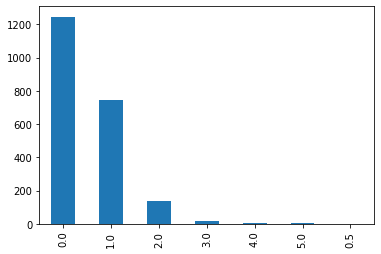

In [19]:
import matplotlib.pyplot as plt

print(len(fam_history),'\n')

# counts = fam_history["First_Fam_Num"].value_counts()
# counts.plot(kind = 'bar')
# print(counts)
# plt.show()


counts = fam_history["First_Fam_PD"].value_counts()
counts.plot(kind = 'bar')
print(counts)

In [20]:
fam_history.to_csv("fam_history.csv")

# =========== Motor Assessments =========== 

# MDS-UPDRS Part 1

In [72]:
pdmds11 = pd.read_csv(path+"MDS_UPDRS_Part_I.csv")
pdmds12 = pd.read_csv(path+"MDS_UPDRS_Part_I__Patient_Questionnaire.csv")
print(len(pdmds11))
print(len(pdmds12))
pdmds11.head()

13904
13907


,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,NUPSOURC,NP1COG,NP1HALL,NP1DPRS,NP1ANXS,NP1APAT,NP1DDS,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,408779701,S,10362,SC,NUPDRS1,08/2013,1,0,0,0,0.0,0.0,0.0,08/2013,2020-02-11 15:26:24.0,NaN,08/2013
1,605755301,S,10405,SC,NUPDRS1,09/2014,3,0,1,0,0.0,0.0,0.0,12/2016,2020-02-11 15:22:37.0,NaN,12/2016
2,411033201,S,10496,SC,NUPDRS1,06/2013,1,0,0,0,0.0,0.0,0.0,09/2013,2020-02-12 11:27:56.0,NaN,09/2013
3,409589201,S,10606,SC,NUPDRS1,08/2013,1,0,0,0,1.0,0.0,0.0,09/2013,2020-02-12 14:48:38.0,NaN,03/2015
4,448325701,S,10662,SC,NUPDRS1,07/2014,1,0,0,0,0.0,0.0,0.0,07/2014,2020-02-11 15:22:47.0,NaN,07/2014


In [73]:
patno_pdmds11 = []
for i in range(len(pdmds11)):
    if(pdmds11["PATNO"][i] not in patno_pdmds11):
        patno_pdmds11.append(pdmds11["PATNO"][i])

print("Number of Patients in File 1:", len(patno_pdmds11))

patno_pdmds12 = []
for i in range(len(pdmds12)):
    if(pdmds12["PATNO"][i] not in patno_pdmds12):
        patno_pdmds12.append(pdmds12["PATNO"][i])

print("Number of Patients in File 2:", len(patno_pdmds12))

patno_pdmds1 = []

for i in patno_pdmds12:
    if(i not in patno_pdmds11):
        print("Patient Number Present in File 2 but not in File 1:", i)
    else:
        patno_pdmds1.append(i)

print("Number of Common Patients in Both Files:", len(patno_pdmds1))

Number of Patients in File 1: 2135
Number of Patients in File 2: 2136
Patient Number Present in File 2 but not in File 1: 3063
Number of Common Patients in Both Files: 2135


In [75]:
lentot = len(patno_pdmds1)
len1 = len(pdmds11)
len2 = len(pdmds12)

mds_updrs1 = pd.DataFrame(columns = ["PATNO", "MDS_UPDRS1"])

for i in range(lentot):
    
    if(i%100 == 0):
        print(i)
    
    patno = patno_pdmds1[i]
    
    count1 = 0
    total1 = [0,0,0,0,0,0]
    
    count2 = 0
    total2 = [0,0,0,0,0,0,0]
    
    for j in range(len1):
        
        patnoj = pdmds11["PATNO"][j]
        if(patnoj != patno):
            continue
            
        count1 +=1
        
        val1 = pdmds11["NP1COG"][j]
        val2 = pdmds11["NP1HALL"][j]
        val3 = pdmds11["NP1DPRS"][j]
        val4 = pdmds11["NP1ANXS"][j]
        val5 = pdmds11["NP1APAT"][j]
        val6 = pdmds11["NP1DDS"][j]
        
        if(pd.isna(val1) == True): 
            val1 = 0
        else: 
            val1 = int(val1)
        if(pd.isna(val2) == True): 
            val2 = 0
        else: 
            val2 = int(val2)
        if(pd.isna(val3) == True): 
            val3 = 0
        else: 
            val3 = int(val3)
        if(pd.isna(val4) == True): 
            val4 = 0
        else: 
            val4 = int(val4)
        if(pd.isna(val5) == True): 
            val5 = 0
        else: 
            val5 = int(val5)
        if(pd.isna(val6) == True): 
            val6 = 0
        else: 
            val6 = int(val6)       
        
        total1[0] += val1
        total1[1] += val2
        total1[2] += val3
        total1[3] += val4
        total1[4] += val5
        total1[5] += val6   
    
    for j in range(len2):
        
        patnoj = pdmds12["PATNO"][j]
        if(patnoj != patno):
            continue
            
        count2 +=1
        
        val1 = pdmds12["NP1SLPN"][j]
        val2 = pdmds12["NP1SLPD"][j]
        val3 = pdmds12["NP1PAIN"][j]
        val4 = pdmds12["NP1URIN"][j]
        val5 = pdmds12["NP1CNST"][j]
        val6 = pdmds12["NP1LTHD"][j]
        val7 = pdmds12["NP1FATG"][j]
        
        if(pd.isna(val1) == True): 
            val1 = 0
        else: 
            val1 = int(val1)
        if(pd.isna(val2) == True): 
            val2 = 0
        else: 
            val2 = int(val2)
        if(pd.isna(val3) == True): 
            val3 = 0
        else: 
            val3 = int(val3)
        if(pd.isna(val4) == True): 
            val4 = 0
        else: 
            val4 = int(val4)
        if(pd.isna(val5) == True): 
            val5 = 0
        else: 
            val5 = int(val5)
        if(pd.isna(val6) == True): 
            val6 = 0
        else: 
            val6 = int(val6)
        if(pd.isna(val7) == True): 
            val7 = 0
        else: 
            val7 = int(val7)
            
        total2[0] += val1
        total2[1] += val2
        total2[2] += val3
        total2[3] += val4
        total2[4] += val5
        total2[5] += val6
        total2[6] += val7
        
    score = np.sum(total1)/count1 + np.sum(total2)/count2
        
    tempdict = dict()
    tempdict["PATNO"] = patno
    tempdict["MDS_UPDRS1"] = score

    mds_updrs1 = mds_updrs1.append(tempdict, ignore_index = True)       

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100


In [76]:
print(len(mds_updrs1))
mds_updrs1.head()

2135


,PATNO,MDS_UPDRS1
0,10362.0,3.0
1,10405.0,12.0
2,10496.0,0.0
3,10606.0,6.0
4,10662.0,1.0


# MDS-UPDRS Part 2

In [77]:
pdmds2 = pd.read_csv(path+"MDS_UPDRS_Part_II__Patient_Questionnaire.csv")
print(len(pdmds2))
pdmds2.head()

13908


,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,NUPSOURC,NP2SPCH,NP2SALV,NP2SWAL,...,NP2HOBB,NP2TURN,NP2TRMR,NP2RISE,NP2WALK,NP2FREZ,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,408781701,S,10362,SC,NUPDRS2P,08/2013,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,08/2013,2020-02-11 15:26:24.0,NaN,08/2013
1,605758301,S,10405,SC,NUPDRS2P,09/2014,1,0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,12/2016,2020-02-11 15:22:37.0,NaN,12/2016
2,411034001,S,10496,SC,NUPDRS2P,06/2013,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,09/2013,2020-02-12 11:27:56.0,NaN,09/2013
3,409589601,S,10606,SC,NUPDRS2P,08/2013,1,0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,09/2013,2020-02-12 14:48:38.0,NaN,03/2015
4,448326201,S,10662,SC,NUPDRS2P,07/2014,1,0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,07/2014,2020-02-11 15:22:47.0,NaN,07/2014


In [83]:
patno_pdmds2 = []
for i in range(len(pdmds2)):
    if(pdmds2["PATNO"][i] not in patno_pdmds2):
        patno_pdmds2.append(pdmds2["PATNO"][i])

print("Number of Patients:", len(patno_pdmds2))

Number of Patients: 2136


In [84]:
lentot = len(patno_pdmds2)
len1 = len(pdmds2)

mds_updrs2 = pd.DataFrame(columns = ["PATNO", "MDS_UPDRS2"])

for i in range(lentot):
    
    if(i%100 == 0):
        print(i)
    
    patno = patno_pdmds2[i]
    
    count1 = 0
    total1 = [0,0,0,0,0,0,0,0,0,0,0,0,0]
        
    for j in range(len1):
        
        patnoj = pdmds2["PATNO"][j]
        if(patnoj != patno):
            continue
            
        count1 +=1
        
        val1 = pdmds2["NP2SPCH"][j]
        val2 = pdmds2["NP2SALV"][j]
        val3 = pdmds2["NP2SWAL"][j]
        val4 = pdmds2["NP2EAT"][j]
        val5 = pdmds2["NP2DRES"][j]
        val6 = pdmds2["NP2HYGN"][j]
        val7 = pdmds2["NP2HWRT"][j]
        val8 = pdmds2["NP2HOBB"][j]
        val9 = pdmds2["NP2TURN"][j]
        val10 = pdmds2["NP2TRMR"][j]
        val11 = pdmds2["NP2RISE"][j]
        val12 = pdmds2["NP2WALK"][j]
        val13 = pdmds2["NP2FREZ"][j]
        
        
        if(pd.isna(val1) == True): 
            val1 = 0
        else: 
            val1 = int(val1)
        if(pd.isna(val2) == True): 
            val2 = 0
        else: 
            val2 = int(val2)
        if(pd.isna(val3) == True): 
            val3 = 0
        else: 
            val3 = int(val3)
        if(pd.isna(val4) == True): 
            val4 = 0
        else: 
            val4 = int(val4)
        if(pd.isna(val5) == True): 
            val5 = 0
        else: 
            val5 = int(val5)
        if(pd.isna(val6) == True): 
            val6 = 0
        else: 
            val6 = int(val6)
        if(pd.isna(val7) == True): 
            val7 = 0
        else: 
            val7 = int(val7)
        if(pd.isna(val8) == True): 
            val8 = 0
        else: 
            val8 = int(val8)
        if(pd.isna(val9) == True): 
            val9 = 0
        else: 
            val9 = int(val9)
        if(pd.isna(val10) == True): 
            val10 = 0
        else: 
            val10 = int(val10)
        if(pd.isna(val11) == True): 
            val11 = 0
        else: 
            val11 = int(val11)
        if(pd.isna(val12) == True): 
            val12 = 0
        else: 
            val12 = int(val12)
        if(pd.isna(val13) == True): 
            val13 = 0
        else: 
            val13 = int(val13)
        
        total1[0] += val1
        total1[1] += val2
        total1[2] += val3
        total1[3] += val4
        total1[4] += val5
        total1[5] += val6
        total1[6] += val7
        total1[7] += val8
        total1[8] += val9
        total1[9] += val10
        total1[10] += val11
        total1[11] += val12
        total1[12] += val13
    
        
    score = np.sum(total1)/count1
        
    tempdict = dict()
    tempdict["PATNO"] = patno
    tempdict["MDS_UPDRS2"] = score
    
    mds_updrs2 = mds_updrs2.append(tempdict, ignore_index = True)     

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100


In [85]:
print(len(mds_updrs2))
mds_updrs2.head()

2136


,PATNO,MDS_UPDRS2
0,10362.0,0.0
1,10405.0,2.0
2,10496.0,0.0
3,10606.0,1.0
4,10662.0,2.0


# MDS-UPDRS Part 3

In [102]:
pdmds3 = pd.read_csv(path+"MDS_UPDRS_Part_III.csv")
print(len(pdmds3))
pdmds3.head()

15843


,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,PDMEDDT,PDMEDTM,PDSTATE,EXAMTM,...,DYSKPRES,DYSKIRAT,NHY,ANNUAL_TIME_BTW_DOSE_NUPDRS,ON_OFF_DOSE,PD_MED_USE,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,388801201,S,3904,V02,NUPDRS3,03/2013,NaN,NaN,NaN,10:23:00,...,0.0,NaN,2.0,NaN,NaN,0.0,03/2013,2020-06-23 12:42:16.0,NaN,03/2013
1,388836101,V,3916,SC,NUPDRS3,03/2013,NaN,NaN,NaN,NaN,...,0.0,NaN,2.0,NaN,NaN,NaN,03/2013,2013-03-12 11:53:56.0,NaN,03/2013
2,388840801,S,3915,BL,NUPDRS3,03/2013,NaN,NaN,NaN,16:30:00,...,0.0,NaN,2.0,NaN,NaN,NaN,03/2013,2020-06-16 13:54:34.0,NaN,03/2013
3,388845001,V,3591,BL,NUPDRS3,03/2013,NaN,NaN,NaN,11:54:00,...,0.0,NaN,1.0,NaN,NaN,NaN,03/2013,2013-03-12 12:14:32.0,NaN,03/2013
4,388915001,S,4114,SC,NUPDRS3,03/2013,NaN,NaN,NaN,NaN,...,0.0,NaN,2.0,NaN,NaN,NaN,03/2013,2020-01-13 14:50:33.0,NaN,03/2013


In [103]:
patno_pdmds3 = []
for i in range(len(pdmds3)):
    if(pdmds3["PATNO"][i] not in patno_pdmds3):
        patno_pdmds3.append(pdmds3["PATNO"][i])

print("Number of Patients:", len(patno_pdmds3))

Number of Patients: 2134


In [104]:
print(list(pdmds3.columns))
print(list(pdmds3.columns)[11])
print(list(pdmds3.columns)[43])

['REC_ID', 'F_STATUS', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'PDMEDDT', 'PDMEDTM', 'PDSTATE', 'EXAMTM', 'DBS_STATUS', 'NP3SPCH', 'NP3FACXP', 'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'PN3RIGRL', 'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 'NP3PRSPL', 'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 'NP3PTRML', 'NP3KTRMR', 'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 'NP3RTALL', 'NP3RTALJ', 'NP3RTCON', 'DYSKPRES', 'DYSKIRAT', 'NHY', 'ANNUAL_TIME_BTW_DOSE_NUPDRS', 'ON_OFF_DOSE', 'PD_MED_USE', 'ORIG_ENTRY', 'LAST_UPDATE', 'QUERY', 'SITE_APRV']
NP3SPCH
NP3RTCON


In [106]:
lentot = len(patno_pdmds3)
len1 = len(pdmds3)
columns = list(pdmds3.columns)

mds_updrs3 = pd.DataFrame(columns = ["PATNO", "MDS_UPDRS3"])

for i in range(lentot):
    
    if(i%100 == 0):
        print(i)
    
    patno = patno_pdmds3[i]
    
    count1 = 0
    total1 = np.zeros(33)
        
    for j in range(len1):
        
        patnoj = pdmds3["PATNO"][j]
        if(patnoj != patno):
            continue
            
        count1 +=1
        
        for x in range(len(columns)):
            
            if(x>=11 and x<=43):
                val = pdmds3[columns[x]][j]
                if(pd.isna(val) == True):
                    val = 0
                else:
                    val = int(val)
                total1[x-11] += val
    
    score = np.sum(total1)/count1
        
    tempdict = dict()
    tempdict["PATNO"] = patno
    tempdict["MDS_UPDRS3"] = score
    
    mds_updrs3 = mds_updrs3.append(tempdict, ignore_index = True)       

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100


In [107]:
print(len(mds_updrs3))
mds_updrs3.head()

2134


,PATNO,MDS_UPDRS3
0,3904.0,51.785714
1,3916.0,25.357143
2,3915.0,34.750000
3,3591.0,18.000000
4,4114.0,27.100000


# MDS-UPDRS Part 4

In [115]:
pdmds4 = pd.read_csv(path+"MDS_UPDRS_Part_IV.csv")
print(len(pdmds4))
pdmds4.head()

5699


,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,NP4WDYSK,NP4DYSKI,NP4OFF,NP4FLCTI,NP4FLCTX,NP4DYSTN,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,267411701,S,3403,ST,NUPDRS4,01/2011,0,0,0.0,0.0,0.0,0.0,01/2011,2020-06-29 14:40:45.0,NaN,01/2011
1,280733601,S,3251,U01,NUPDRS4,02/2011,0,0,0.0,0.0,0.0,0.0,03/2011,2020-06-24 13:58:46.0,NaN,03/2011
2,304301401,S,3800,ST,NUPDRS4,07/2011,0,0,0.0,0.0,0.0,0.0,07/2011,2020-06-26 10:05:29.0,NaN,07/2011
3,303916001,S,3400,V04,NUPDRS4,07/2011,0,0,0.0,0.0,0.0,0.0,07/2011,2020-06-29 14:40:03.0,NaN,07/2011
4,306573401,S,3403,V04,NUPDRS4,07/2011,0,0,0.0,0.0,0.0,0.0,07/2011,2020-06-29 14:40:46.0,NaN,07/2011


In [116]:
patno_pdmds4 = []
for i in range(len(pdmds4)):
    if(pdmds4["PATNO"][i] not in patno_pdmds4):
        patno_pdmds4.append(pdmds4["PATNO"][i])

print("Number of Patients:", len(patno_pdmds4))

Number of Patients: 917


In [118]:
print(list(pdmds4.columns))
print(list(pdmds4.columns)[6])
print(list(pdmds4.columns)[11])

['REC_ID', 'F_STATUS', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'NP4WDYSK', 'NP4DYSKI', 'NP4OFF', 'NP4FLCTI', 'NP4FLCTX', 'NP4DYSTN', 'ORIG_ENTRY', 'LAST_UPDATE', 'QUERY', 'SITE_APRV']
NP4WDYSK
NP4DYSTN


In [120]:
lentot = len(patno_pdmds4)
len1 = len(pdmds4)
columns = list(pdmds4.columns)

mds_updrs4 = pd.DataFrame(columns = ["PATNO", "MDS_UPDRS4"])

for i in range(lentot):
    
    if(i%100 == 0):
        print(i)
    
    patno = patno_pdmds4[i]
    
    count1 = 0
    total1 = np.zeros(6)
        
    for j in range(len1):
        
        patnoj = pdmds4["PATNO"][j]
        if(patnoj != patno):
            continue
            
        count1 +=1
        
        for x in range(len(columns)):
            
            if(x>=6 and x<=11):
                val = pdmds4[columns[x]][j]
                if(pd.isna(val) == True):
                    val = 0
                else:
                    val = int(val)
                total1[x-6] += val
    
    score = np.sum(total1)/count1
        
    tempdict = dict()
    tempdict["PATNO"] = patno
    tempdict["MDS_UPDRS4"] = score
    
    mds_updrs4 = mds_updrs4.append(tempdict, ignore_index = True)

0
100
200
300
400
500
600
700
800
900


In [121]:
print(len(mds_updrs4))
mds_updrs4.head()

917


,PATNO,MDS_UPDRS4
0,3403.0,2.214286
1,3251.0,3.500000
2,3800.0,0.428571
3,3400.0,4.250000
4,3406.0,1.692308


# Saving CSVs

In [122]:
randomization.to_csv("randomization.csv")
screening_demo.to_csv("screening_demo.csv")
mds_updrs1.to_csv("mds_updrs1.csv")
mds_updrs2.to_csv("mds_updrs2.csv")
mds_updrs3.to_csv("mds_updrs3.csv")
mds_updrs4.to_csv("mds_updrs4.csv")

# TD-PIGD score

In [123]:
pdmds2 = pd.read_csv(path+"MDS_UPDRS_Part_II__Patient_Questionnaire.csv")
print(len(pdmds2))

pdmds3 = pd.read_csv(path+"MDS_UPDRS_Part_III.csv")
print(len(pdmds3))

13908
15843


In [126]:
patno_pdmds2 = []
for i in range(len(pdmds2)):
    if(pdmds2["PATNO"][i] not in patno_pdmds2):
        patno_pdmds2.append(pdmds2["PATNO"][i])

print("Number of Patients in File 2:", len(patno_pdmds2))

patno_pdmds3 = []
for i in range(len(pdmds3)):
    if(pdmds3["PATNO"][i] not in patno_pdmds3):
        patno_pdmds3.append(pdmds3["PATNO"][i])

print("Number of Patients in File 3:", len(patno_pdmds3))

patno_pdmds23 = []

for i in patno_pdmds3:
    if(i not in patno_pdmds2):
        print("Patient Number Present in File 3 but not in File 2:", i)
    else:
        patno_pdmds23.append(i)
for i in patno_pdmds2:
    if(i not in patno_pdmds3):
        print("Patient Number Present in File 2 but not in File 3:", i)

print("Number of Common Patients in Both Files:", len(patno_pdmds23))

Number of Patients in File 2: 2136
Number of Patients in File 3: 2134
Patient Number Present in File 3 but not in File 2: 3005
Patient Number Present in File 2 but not in File 3: 10939
Patient Number Present in File 2 but not in File 3: 3063
Patient Number Present in File 2 but not in File 3: 41513
Number of Common Patients in Both Files: 2133


In [139]:
print(list(pdmds2.columns))
print(list(pdmds2.columns)[16])
print(list(pdmds2.columns)[18])
print(list(pdmds2.columns)[19])

print()

print(list(pdmds3.columns))
print(list(pdmds3.columns)[34])
print(list(pdmds3.columns)[43])
print(list(pdmds3.columns)[29])
print(list(pdmds3.columns)[31])

['REC_ID', 'F_STATUS', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'NUPSOURC', 'NP2SPCH', 'NP2SALV', 'NP2SWAL', 'NP2EAT', 'NP2DRES', 'NP2HYGN', 'NP2HWRT', 'NP2HOBB', 'NP2TURN', 'NP2TRMR', 'NP2RISE', 'NP2WALK', 'NP2FREZ', 'ORIG_ENTRY', 'LAST_UPDATE', 'QUERY', 'SITE_APRV']
NP2TRMR
NP2WALK
NP2FREZ

['REC_ID', 'F_STATUS', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'PDMEDDT', 'PDMEDTM', 'PDSTATE', 'EXAMTM', 'DBS_STATUS', 'NP3SPCH', 'NP3FACXP', 'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'PN3RIGRL', 'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 'NP3PRSPL', 'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 'NP3PTRML', 'NP3KTRMR', 'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 'NP3RTALL', 'NP3RTALJ', 'NP3RTCON', 'DYSKPRES', 'DYSKIRAT', 'NHY', 'ANNUAL_TIME_BTW_DOSE_NUPDRS', 'ON_OFF_DOSE', 'PD_MED_USE', 'ORIG_ENTRY', 'LAST_UPDATE', 'QUERY', 'SITE_APRV']
NP3PTRMR
NP3RTCON
NP3GAIT
NP3PSTBL


In [144]:
lentot = len(patno_pdmds23)
len1 = len(pdmds2)
len2 = len(pdmds3)
columns1 = list(pdmds2.columns)
columns2 = list(pdmds3.columns)

td_pigd = pd.DataFrame(columns = ["PATNO", "TREMOR", "PIGD"])

for i in range(lentot):
    
    if(i%100 == 0):
        print(i)
    
    patno = patno_pdmds23[i]
    
    count1 = 0
    total1 = np.zeros(1)
    total3 = np.zeros(2)
    count2 = 0
    total2 = np.zeros(10)
    total4 = np.zeros(3)
        
    for j in range(len1):
        
        patnoj = pdmds2["PATNO"][j]
        if(patnoj != patno):
            continue
            
        count1 +=1
        
        for x in range(len(columns1)):
            
            if(x == 16):
                val = pdmds2[columns1[x]][j]
                if(pd.isna(val) == True):
                    val = 0
                else:
                    val = int(val)
                total1[0] += val
                
            if(x == 18 or x == 19):
                val = pdmds2[columns1[x]][j]
                if(pd.isna(val) == True):
                    val = 0
                else:
                    val = int(val)
                total3[x-18] += val
                
    for j in range(len2):
        
        patnoj = pdmds3["PATNO"][j]
        if(patnoj != patno):
            continue
            
        count2 +=1
        
        for x in range(len(columns2)):
            
            if(x >= 34 and x<=43):
                val = pdmds3[columns2[x]][j]
                if(pd.isna(val) == True):
                    val = 0
                else:
                    val = int(val)
                total2[x-34] += val 
                
            if(x >= 29 and x <= 31):
                val = pdmds3[columns2[x]][j]
                if(pd.isna(val) == True):
                    val = 0
                else:
                    val = int(val)
                total4[x-29] += val
    
    
    tremor_score = (np.sum(total1)/count1)/1 + (np.sum(total2)/count2)/10         
    pigd_score = (np.sum(total3)/count1)/2 + (np.sum(total4)/count2)/3
        
    tempdict = dict()
    tempdict["PATNO"] = patno
    tempdict["TREMOR"] = tremor_score
    tempdict["PIGD"] = pigd_score
    
    td_pigd = td_pigd.append(tempdict, ignore_index = True)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100


In [145]:
print(len(td_pigd))
td_pigd.head()

2133


,PATNO,TREMOR,PIGD
0,3904.0,2.052381,1.267857
1,3916.0,1.945238,0.863095
2,3915.0,3.537500,1.916667
3,3591.0,1.742857,0.166667
4,4114.0,2.996667,0.800000


In [146]:
td_pigd.to_csv("td_pigd.csv")

# =========== Non-Motor Assessments =========== 

# Benton Judgement of Line Orientation

In [152]:
pd_bjlo = pd.read_csv(path+"Benton_Judgment_of_Line_Orientation.csv")
print(len(pd_bjlo))
pd_bjlo.head()

6970


,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,BJLOT1,BJLOT2,BJLOT3,BJLOT4,...,BJLOT30,JLO_TOTRAW,JLO_TOTCALC,AGE_ASSESS_JLO,DVS_JLO_MSSA,DVS_JLO_MSSAE,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,233165301,S,3400,BL,BENTONOD,07/2010,1.0,NaN,1.0,NaN,...,NaN,13.0,26.0,39.0,13.0,11.70,07/2010,2020-06-29 14:40:01.0,NaN,07/2010
1,232531901,S,3401,BL,BENTONOD,07/2010,0.0,NaN,1.0,NaN,...,NaN,9.0,18.0,56.0,8.0,5.97,07/2010,2020-06-29 14:40:24.0,NaN,07/2010
2,234839901,S,3404,BL,BENTONOD,07/2010,1.0,NaN,1.0,NaN,...,NaN,15.0,30.0,55.0,16.0,15.92,07/2010,2020-06-29 14:41:41.0,NaN,07/2010
3,236091401,S,3405,BL,BENTONOD,07/2010,1.0,NaN,1.0,NaN,...,NaN,14.0,28.0,63.0,14.0,12.80,07/2010,2020-01-13 15:16:51.0,NaN,07/2010
4,231742101,S,3403,BL,BENTONOD,07/2010,1.0,NaN,1.0,NaN,...,NaN,13.0,26.0,68.0,13.0,11.70,07/2010,2020-06-29 14:40:44.0,NaN,07/2010


In [153]:
patno_bjlo = []
for i in range(len(pd_bjlo)):
    if(pd_bjlo["PATNO"][i] not in patno_bjlo):
        patno_bjlo.append(pd_bjlo["PATNO"][i])

print("Number of Patients:", len(patno_bjlo))

Number of Patients: 1475


In [154]:
print(list(pd_bjlo.columns))
print(list(pd_bjlo.columns)[6])
print(list(pd_bjlo.columns)[35])

['REC_ID', 'F_STATUS', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'BJLOT1', 'BJLOT2', 'BJLOT3', 'BJLOT4', 'BJLOT5', 'BJLOT6', 'BJLOT7', 'BJLOT8', 'BJLOT9', 'BJLOT10', 'BJLOT11', 'BJLOT12', 'BJLOT13', 'BJLOT14', 'BJLOT15', 'BJLOT16', 'BJLOT17', 'BJLOT18', 'BJLOT19', 'BJLOT20', 'BJLOT21', 'BJLOT22', 'BJLOT23', 'BJLOT24', 'BJLOT25', 'BJLOT26', 'BJLOT27', 'BJLOT28', 'BJLOT29', 'BJLOT30', 'JLO_TOTRAW', 'JLO_TOTCALC', 'AGE_ASSESS_JLO', 'DVS_JLO_MSSA', 'DVS_JLO_MSSAE', 'ORIG_ENTRY', 'LAST_UPDATE', 'QUERY', 'SITE_APRV']
BJLOT1
BJLOT30


In [159]:
lentot = len(patno_bjlo)
len1 = len(pd_bjlo)
columns = list(pd_bjlo.columns)

bjlo = pd.DataFrame(columns = ["PATNO", "BJLO"])

for i in range(lentot):
    
    if(i%100 == 0):
        print(i)
    
    patno = patno_bjlo[i]
    
    count1 = 0
    total1 = np.zeros(30)
        
    for j in range(len1):
        
        patnoj = pd_bjlo["PATNO"][j]
        if(patnoj != patno):
            continue
            
        count1 +=1
        
        for x in range(len(columns)):
            
            if(x>=6 and x<=35):
                val = pd_bjlo[columns[x]][j]
                if(pd.isna(val) == True):
                    val = 0
                else:
                    val = int(val)
                total1[x-6] += val
    
    score = np.sum(total1)/count1
        
    tempdict = dict()
    tempdict["PATNO"] = patno
    tempdict["BJLO"] = score
    
    bjlo = bjlo.append(tempdict, ignore_index = True)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400


In [160]:
print(len(bjlo))
bjlo.head()

1475


,PATNO,BJLO
0,3400.0,12.300000
1,3401.0,12.111111
2,3404.0,13.444444
3,3405.0,14.000000
4,3403.0,13.200000


In [161]:
bjlo.to_csv("bjlo.csv")

# Epworth Sleepiness Scale (ESS)


In [141]:
pd_ess = pd.read_csv(path+"Epworth_Sleepiness_Scale.csv")
print(len(pd_ess))
pd_ess.head()

8227


,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,PTCGBOTH,ESS1,ESS2,ESS3,ESS4,ESS5,ESS6,ESS7,ESS8,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,234842801,S,3404,BL,EPWORTH,07/2010,1.0,1,1.0,1,0,3.0,0,1,0.0,07/2010,2020-06-29 14:41:41.0,NaN,07/2010
1,233819801,S,3400,BL,EPWORTH,07/2010,1.0,2,2.0,1,3,3.0,0,1,0.0,07/2010,2020-06-29 14:40:01.0,NaN,07/2010
2,232533701,S,3401,BL,EPWORTH,07/2010,1.0,1,1.0,0,1,2.0,0,0,0.0,07/2010,2020-06-29 14:40:24.0,NaN,07/2010
3,236092201,S,3405,BL,EPWORTH,07/2010,1.0,0,0.0,0,2,0.0,0,0,0.0,07/2010,2020-01-13 15:16:51.0,NaN,07/2010
4,231743201,S,3403,BL,EPWORTH,07/2010,1.0,3,3.0,0,0,2.0,0,0,0.0,07/2010,2020-06-29 14:40:44.0,NaN,07/2010


In [142]:
patno_ess = []
for i in range(len(pd_ess)):
    if(pd_ess["PATNO"][i] not in patno_ess):
        patno_ess.append(pd_ess["PATNO"][i])

print("Number of Patients:", len(patno_ess))

Number of Patients: 1480


In [143]:
print(list(pd_ess.columns))
print(list(pd_ess.columns)[7])
print(list(pd_ess.columns)[14])

['REC_ID', 'F_STATUS', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'PTCGBOTH', 'ESS1', 'ESS2', 'ESS3', 'ESS4', 'ESS5', 'ESS6', 'ESS7', 'ESS8', 'ORIG_ENTRY', 'LAST_UPDATE', 'QUERY', 'SITE_APRV']
ESS1
ESS8


In [144]:
lentot = len(patno_ess)
len1 = len(pd_ess)
columns = list(pd_ess.columns)

ess = pd.DataFrame(columns = ["PATNO", "ESS", "SLEEPINESS"])

for i in range(lentot):
    
    if(i%100 == 0):
        print(i)
    
    patno = patno_ess[i]
    
    count1 = 0
    total1 = np.zeros(8)
        
    for j in range(len1):
        
        patnoj = pd_ess["PATNO"][j]
        if(patnoj != patno):
            continue
            
        count1 +=1
        
        for x in range(len(columns)):
            
            if(x>=7 and x<=14):
                val = pd_ess[columns[x]][j]
                if(pd.isna(val) == True):
                    val = 0
                else:
                    val = int(val)
                total1[x-7] += val
    
    score = np.sum(total1)/count1
    
    status = ""
    if(score < 10):
        status = "Not Sleepy"
    else:
        status = "Sleepy"
        
    tempdict = dict()
    tempdict["PATNO"] = patno
    tempdict["ESS"] = score
    tempdict["SLEEPINESS"] = status
    
    ess = ess.append(tempdict, ignore_index = True)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400


In [145]:
print(len(ess))
ess.head()

1480


,PATNO,ESS,SLEEPINESS
0,3404,3.666667,Not Sleepy
1,3400,14.636364,Sleepy
2,3401,5.444444,Not Sleepy
3,3405,2.000000,Not Sleepy
4,3403,5.454545,Not Sleepy


Not Sleepy    1260
Sleepy         220
Name: SLEEPINESS, dtype: int64


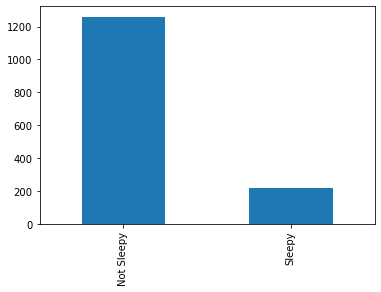

In [146]:
counts = ess["SLEEPINESS"].value_counts()
counts.plot(kind = 'bar')
print(counts)

In [147]:
ess.to_csv("ess.csv")

# Geriatric Depression Scale (GDS)

In [148]:
pd_gds = pd.read_csv(path+"Geriatric_Depression_Scale__Short_.csv")
print(len(pd_gds))
pd_gds.head()

8546


,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,GDSSATIS,GDSDROPD,GDSEMPTY,GDSBORED,...,GDSMEMRY,GDSALIVE,GDSWRTLS,GDSENRGY,GDSHOPLS,GDSBETER,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,408782301,S,10362,SC,GDSSHORT,08/2013,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,08/2013,2020-02-11 15:26:24.0,NaN,08/2013
1,605760101,S,10405,SC,GDSSHORT,09/2014,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,12/2016,2020-02-11 15:22:36.0,NaN,12/2016
2,411035701,S,10496,SC,GDSSHORT,06/2013,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,09/2013,2020-02-12 11:27:56.0,NaN,09/2013
3,409588601,S,10606,SC,GDSSHORT,08/2013,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,09/2013,2015-06-26 11:35:12.0,NaN,03/2015
4,448228501,S,10662,SC,GDSSHORT,06/2014,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,07/2014,2020-02-11 15:22:46.0,NaN,07/2014


In [149]:
patno_gds = []
for i in range(len(pd_gds)):
    if(pd_gds["PATNO"][i] not in patno_gds):
        patno_gds.append(pd_gds["PATNO"][i])

print("Number of Patients:", len(patno_gds))

Number of Patients: 1615


In [150]:
print(list(pd_gds.columns))
print(list(pd_gds.columns)[6])
print(list(pd_gds.columns)[20])

['REC_ID', 'F_STATUS', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'GDSSATIS', 'GDSDROPD', 'GDSEMPTY', 'GDSBORED', 'GDSGSPIR', 'GDSAFRAD', 'GDSHAPPY', 'GDSHLPLS', 'GDSHOME', 'GDSMEMRY', 'GDSALIVE', 'GDSWRTLS', 'GDSENRGY', 'GDSHOPLS', 'GDSBETER', 'ORIG_ENTRY', 'LAST_UPDATE', 'QUERY', 'SITE_APRV']
GDSSATIS
GDSBETER


In [151]:
# Invert these columns because "Add 1 point for each response of “No” (0)" for these columns

cols_list = ["GDSSATIS", "GDSGSPIR", "GDSHAPPY", "GDSALIVE", "GDSENRGY"]
for col in cols_list:
    pd_gds[col] = pd_gds[col].replace({0:1, 1:0})
    
pd_gds.head()

,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,GDSSATIS,GDSDROPD,GDSEMPTY,GDSBORED,...,GDSMEMRY,GDSALIVE,GDSWRTLS,GDSENRGY,GDSHOPLS,GDSBETER,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,408782301,S,10362,SC,GDSSHORT,08/2013,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,08/2013,2020-02-11 15:26:24.0,NaN,08/2013
1,605760101,S,10405,SC,GDSSHORT,09/2014,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,12/2016,2020-02-11 15:22:36.0,NaN,12/2016
2,411035701,S,10496,SC,GDSSHORT,06/2013,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,09/2013,2020-02-12 11:27:56.0,NaN,09/2013
3,409588601,S,10606,SC,GDSSHORT,08/2013,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,09/2013,2015-06-26 11:35:12.0,NaN,03/2015
4,448228501,S,10662,SC,GDSSHORT,06/2014,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,07/2014,2020-02-11 15:22:46.0,NaN,07/2014


In [152]:
lentot = len(patno_gds)
len1 = len(pd_gds)
columns = list(pd_gds.columns)

gds = pd.DataFrame(columns = ["PATNO", "GDS", "DEPRESSION"])

for i in range(lentot):
    
    if(i%100 == 0):
        print(i)
    
    patno = patno_gds[i]
    
    count1 = 0
    total1 = np.zeros(15)
        
    for j in range(len1):
        
        patnoj = pd_gds["PATNO"][j]
        if(patnoj != patno):
            continue
            
        count1 +=1
        
        for x in range(len(columns)):
            
            if(x>=6 and x<=20):
                val = pd_gds[columns[x]][j]
                if(pd.isna(val) == True):
                    val = 0
                else:
                    val = int(val)
                total1[x-6] += val
    
    score = np.sum(total1)/count1
    
    status = ""
    if(score < 5):
        status = "Not Depressed"
    else:
        status = "Depressed"
        
    tempdict = dict()
    tempdict["PATNO"] = patno
    tempdict["GDS"] = score
    tempdict["DEPRESSION"] = status
    
    gds = gds.append(tempdict, ignore_index = True)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600


In [153]:
print(len(gds))
gds.head()

1615


,PATNO,GDS,DEPRESSION
0,10362,0.0,Not Depressed
1,10405,3.0,Not Depressed
2,10496,0.0,Not Depressed
3,10606,0.0,Not Depressed
4,10662,0.0,Not Depressed


Not Depressed    1382
Depressed         233
Name: DEPRESSION, dtype: int64


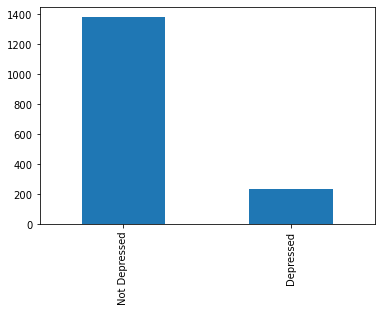

In [154]:
counts = gds["DEPRESSION"].value_counts()
counts.plot(kind = 'bar')
print(counts)

In [155]:
gds.to_csv("gds.csv")

# Hopkins Verbal Learning Test (HVLT)

In [156]:
pd_hvlt = pd.read_csv(path+"Hopkins_Verbal_Learning_Test.csv")
print(len(pd_hvlt))
pd_hvlt.head()

6999


,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,HVLTRT1,HVLTRT2,HVLTRT3,HVLTRDLY,...,HVLTVRSN,AGE_ASSESS_HVLT,DVT_TOTAL_RECALL,DVT_DELAYED_RECALL,DVT_RETENTION,DVT_RECOG_DISC_INDEX,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,231741801,S,3403,BL,HVLT,07/2010,6.0,7.0,8.0,9.0,...,1.0,68.0,44.0,52.0,63.0,47.0,07/2010,2020-06-29 14:40:44.0,NaN,07/2010
1,232531001,S,3401,BL,HVLT,07/2010,6.0,10.0,11.0,12.0,...,1.0,56.0,49.0,61.0,62.0,51.0,07/2010,2020-06-29 14:40:24.0,NaN,07/2010
2,233165101,S,3400,BL,HVLT,07/2010,8.0,10.0,10.0,11.0,...,1.0,39.0,49.0,54.0,62.0,58.0,07/2010,2020-06-29 14:40:01.0,NaN,07/2010
3,234838901,S,3404,BL,HVLT,07/2010,8.0,10.0,11.0,12.0,...,1.0,55.0,54.0,61.0,62.0,44.0,07/2010,2020-06-29 14:41:41.0,NaN,07/2010
4,236090801,S,3405,BL,HVLT,07/2010,6.0,9.0,12.0,10.0,...,1.0,63.0,51.0,53.0,44.0,52.0,07/2010,2020-01-13 15:16:51.0,NaN,07/2010


In [157]:
patno_hvlt = []
for i in range(len(pd_hvlt)):
    if(pd_hvlt["PATNO"][i] not in patno_hvlt):
        patno_hvlt.append(pd_hvlt["PATNO"][i])

print("Number of Patients:", len(patno_hvlt))

Number of Patients: 1477


In [158]:
print(list(pd_hvlt.columns))
print(list(pd_hvlt.columns)[6]) 
print(list(pd_hvlt.columns)[9]) 
print(list(pd_hvlt.columns)[10]) 
print(list(pd_hvlt.columns)[11]) 
print(list(pd_hvlt.columns)[12]) 

# Recall = 6+7+8 => 0+1+2
# Recog = 10(11+12) => 4-(5+6)
# Retent = 9/max(7,8) => 3/max(1,2)

['REC_ID', 'F_STATUS', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'HVLTRT1', 'HVLTRT2', 'HVLTRT3', 'HVLTRDLY', 'HVLTREC', 'HVLTFPRL', 'HVLTFPUN', 'HVLTVRSN', 'AGE_ASSESS_HVLT', 'DVT_TOTAL_RECALL', 'DVT_DELAYED_RECALL', 'DVT_RETENTION', 'DVT_RECOG_DISC_INDEX', 'ORIG_ENTRY', 'LAST_UPDATE', 'QUERY', 'SITE_APRV']
HVLTRT1
HVLTRDLY
HVLTREC
HVLTFPRL
HVLTFPUN


In [159]:
lentot = len(patno_hvlt)
len1 = len(pd_hvlt)
columns = list(pd_hvlt.columns)

hvlt = pd.DataFrame(columns = ["PATNO", "HVLT_RECALL", "HVLT_RECOG", "HVLT_RETENT"])

for i in range(lentot):
    
    if(i%100 == 0):
        print(i)
    
    patno = patno_hvlt[i]
    
    count1 = 0
    total1 = np.zeros(7)
    
    recall = 0
    recog = 0
    retent = 0
        
    for j in range(len1):
        
        patnoj = pd_hvlt["PATNO"][j]
        if(patnoj != patno):
            continue
            
        count1 +=1
        
        for x in range(len(columns)):
            
            if(x>=6 and x<=12):
                val = pd_hvlt[columns[x]][j]
                if(pd.isna(val) == True):
                    val = 0
                else:
                    val = int(val)
                total1[x-6] += val
    
    recall = (total1[0]+total1[1]+total1[2]) / count1
    recog = (total1[4]-(total1[5]+total1[6])) / count1
    retent = (total1[3]/count1) / max(total1[1]/count1,total1[2]/count1) 
    
    tempdict = dict()
    tempdict["PATNO"] = patno
    tempdict["HVLT_RECALL"] = recall
    tempdict["HVLT_RECOG"] = recog
    tempdict["HVLT_RETENT"] = retent
    
    hvlt = hvlt.append(tempdict, ignore_index = True)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400


In [160]:
print(len(hvlt))
hvlt.head()

1477


,PATNO,HVLT_RECALL,HVLT_RECOG,HVLT_RETENT
0,3403.0,17.000000,9.600000,0.676923
1,3401.0,28.666667,10.444444,0.948454
2,3400.0,27.300000,11.800000,0.990099
3,3404.0,31.555556,10.666667,0.990291
4,3405.0,27.000000,11.000000,0.833333


In [161]:
hvlt.to_csv("hvlt.csv")

# Letter Number Sequencing (LNS)


In [162]:
pd_lns = pd.read_csv(path+"Letter_-_Number_Sequencing__PD_.csv")
print(len(pd_lns))
pd_lns.head()

6969


,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,LNS1A,LNS1B,LNS1C,LNS2A,...,LNS7A,LNS7B,LNS7C,LNS_TOTRAW,AGE_ASSESS_LNS,DVS_LNS,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,233165701,S,3400,BL,LNSPD,07/2010,1,1,1.0,1.0,...,NaN,NaN,NaN,10,39,9,07/2010,2020-06-29 14:40:01.0,NaN,07/2010
1,232532701,S,3401,BL,LNSPD,07/2010,1,1,1.0,1.0,...,NaN,NaN,NaN,10,56,11,07/2010,2020-06-29 14:40:25.0,NaN,07/2010
2,234840901,S,3404,BL,LNSPD,07/2010,1,1,1.0,1.0,...,0.0,0.0,1.0,15,55,16,07/2010,2020-06-29 14:41:41.0,NaN,07/2010
3,231742701,S,3403,BL,LNSPD,07/2010,1,1,1.0,1.0,...,NaN,NaN,NaN,10,68,11,07/2010,2020-06-29 14:40:44.0,NaN,07/2010
4,236091801,S,3405,BL,LNSPD,07/2010,1,1,1.0,1.0,...,NaN,NaN,NaN,9,63,10,07/2010,2020-01-13 15:16:51.0,NaN,07/2010


In [163]:
patno_lns = []
for i in range(len(pd_lns)):
    if(pd_lns["PATNO"][i] not in patno_lns):
        patno_lns.append(pd_lns["PATNO"][i])

print("Number of Patients:", len(patno_lns))

Number of Patients: 1476


In [164]:
print(list(pd_lns.columns))
print(list(pd_lns.columns)[6]) 
print(list(pd_lns.columns)[26]) 

['REC_ID', 'F_STATUS', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'LNS1A', 'LNS1B', 'LNS1C', 'LNS2A', 'LNS2B', 'LNS2C', 'LNS3A', 'LNS3B', 'LNS3C', 'LNS4A', 'LNS4B', 'LNS4C', 'LNS5A', 'LNS5B', 'LNS5C', 'LNS6A', 'LNS6B', 'LNS6C', 'LNS7A', 'LNS7B', 'LNS7C', 'LNS_TOTRAW', 'AGE_ASSESS_LNS', 'DVS_LNS', 'ORIG_ENTRY', 'LAST_UPDATE', 'QUERY', 'SITE_APRV']
LNS1A
LNS7C


In [165]:
lentot = len(patno_lns)
len1 = len(pd_lns)
columns = list(pd_lns.columns)

lns = pd.DataFrame(columns = ["PATNO", "LNS"])

for i in range(lentot):
    
    if(i%100 == 0):
        print(i)
    
    patno = patno_lns[i]
    
    count1 = 0
    total1 = np.zeros(21)
        
    for j in range(len1):
        
        patnoj = pd_lns["PATNO"][j]
        if(patnoj != patno):
            continue
            
        count1 +=1
        
        for x in range(len(columns)):
            
            if(x>=6 and x<=26):
                val = pd_lns[columns[x]][j]
                if(pd.isna(val) == True):
                    val = 0
                else:
                    val = int(val)
                total1[x-6] += val
    
    score = np.sum(total1)/count1
        
    tempdict = dict()
    tempdict["PATNO"] = patno
    tempdict["LNS"] = score
    
    lns = lns.append(tempdict, ignore_index = True)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400


In [166]:
print(len(lns))
lns.head()

1476


,PATNO,LNS
0,3400.0,8.800000
1,3401.0,10.555556
2,3404.0,16.111111
3,3403.0,7.800000
4,3405.0,9.000000


In [167]:
lns.to_csv("lns.csv")

# Questionnaire for Impulsive‐Compulsive Disorders (QUIP)

In [4]:
pd_quip = pd.read_csv(path+"QUIP_Current_Short.csv")
print(len(pd_quip))
pd_quip.head()

8229


,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,PTINBOTH,TMGAMBLE,CNTRLGMB,TMSEX,...,CNTRLEAT,TMTORACT,TMTMTACT,TMTRWD,TMDISMED,CNTRLDSM,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,232537101,S,3401,BL,QUIPCS,07/2010,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,07/2010,2020-06-29 14:40:25.0,NaN,07/2010
1,233826501,S,3400,BL,QUIPCS,07/2010,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,07/2010,2020-06-29 14:40:01.0,NaN,07/2010
2,234844401,S,3404,BL,QUIPCS,07/2010,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,07/2010,2020-06-29 14:41:41.0,NaN,07/2010
3,231746401,S,3403,BL,QUIPCS,07/2010,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,07/2010,2020-06-29 14:40:44.0,NaN,07/2010
4,236093001,S,3405,BL,QUIPCS,07/2010,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,07/2010,2020-01-13 15:16:51.0,NaN,07/2010


In [5]:
patno_quip = []
for i in range(len(pd_quip)):
    if(pd_quip["PATNO"][i] not in patno_quip):
        patno_quip.append(pd_quip["PATNO"][i])

print("Number of Patients:", len(patno_quip))

Number of Patients: 1482


In [6]:
print(list(pd_quip.columns))
print(list(pd_quip.columns)[7],list(pd_quip.columns)[8])
print(list(pd_quip.columns)[9],list(pd_quip.columns)[10])
print(list(pd_quip.columns)[11],list(pd_quip.columns)[12])
print(list(pd_quip.columns)[13],list(pd_quip.columns)[14])
print(list(pd_quip.columns)[15],list(pd_quip.columns)[16],list(pd_quip.columns)[17])

['REC_ID', 'F_STATUS', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'PTINBOTH', 'TMGAMBLE', 'CNTRLGMB', 'TMSEX', 'CNTRLSEX', 'TMBUY', 'CNTRLBUY', 'TMEAT', 'CNTRLEAT', 'TMTORACT', 'TMTMTACT', 'TMTRWD', 'TMDISMED', 'CNTRLDSM', 'ORIG_ENTRY', 'LAST_UPDATE', 'QUERY', 'SITE_APRV']
TMGAMBLE CNTRLGMB
TMSEX CNTRLSEX
TMBUY CNTRLBUY
TMEAT CNTRLEAT
TMTORACT TMTMTACT TMTRWD


In [7]:
lentot = len(patno_quip)
len1 = len(pd_quip)
columns = list(pd_quip.columns)

quip = pd.DataFrame(columns = ["PATNO","QUIP_SEC_A","QUIP_SEC_B",
                               "QUIP_SEC_C","QUIP_SEC_D","QUIP_SEC_E",])

for i in range(lentot):
    
    if(i%100 == 0):
        print(i)
    
    patno = patno_quip[i]
    
    count1 = 0
    total1 = np.zeros(11)
    
    secA = 0
    secB = 0
    secC = 0
    secD = 0
    secE = 0
        
    for j in range(len1):
        
        patnoj = pd_quip["PATNO"][j]
        if(patnoj != patno):
            continue
            
        count1 +=1
        
        for x in range(len(columns)):
            
            if(x>=7 and x<=17):
                val = pd_quip[columns[x]][j]
                if(pd.isna(val) == True):
                    val = 0
                else:
                    val = int(val)
                total1[x-7] += val
    
    secA = (1 if (total1[0]/count1)  > 0 else 0) or (1 if (total1[1]/count1)  > 0 else 0)
    secB = (1 if (total1[2]/count1)  > 0 else 0) or (1 if (total1[3]/count1)  > 0 else 0)
    secC = (1 if (total1[4]/count1)  > 0 else 0) or (1 if (total1[5]/count1)  > 0 else 0)
    secD = (1 if (total1[6]/count1)  > 0 else 0) or (1 if (total1[7]/count1)  > 0 else 0)
    
    secE = 1 if (total1[8]/count1) > 0 else 0
    secE += 1 if (total1[9]/count1) > 0 else 0
    secE += 1 if (total1[10]/count1) > 0 else 0
     
        
    tempdict = dict()
    tempdict["PATNO"] = patno
    tempdict["QUIP_SEC_A"] = secA
    tempdict["QUIP_SEC_B"] = secB
    tempdict["QUIP_SEC_C"] = secC
    tempdict["QUIP_SEC_D"] = secD
    tempdict["QUIP_SEC_E"] = secE
    
    quip = quip.append(tempdict, ignore_index = True)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400


In [8]:
print(len(quip))
quip.head()

1482


,PATNO,QUIP_SEC_A,QUIP_SEC_B,QUIP_SEC_C,QUIP_SEC_D,QUIP_SEC_E
0,3401,0,0,0,0,0
1,3400,0,0,1,1,0
2,3404,0,0,0,0,0
3,3403,0,0,0,1,0
4,3405,0,0,0,0,0


In [11]:
quip.to_csv("quip.csv")

In [12]:
# Unique patients in Sec-C
len(set(pd_quip[(pd_quip['TMBUY'] == 1) | (pd_quip['CNTRLBUY'] == 1)]['PATNO']))

178

In [13]:
(quip["QUIP_SEC_C"]).value_counts()

0    1304
1     178
Name: QUIP_SEC_C, dtype: int64

# REM Sleep Behavior Screening Questionnaire (RBDSQ)


In [188]:
pd_rbdsq = pd.read_csv(path+"REM_Sleep_Disorder_Questionnaire.csv")
print(len(pd_rbdsq))
pd_rbdsq.head()

8836


,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,PTCGBOTH,DRMVIVID,DRMAGRAC,DRMNOCTB,...,NARCLPSY,DEPRS,EPILEPSY,BRNINFM,CNSOTH,CNSOTHCM,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,456173201,S,10874,BL,REMSLEEP,09/2014,1.0,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,09/2014,2020-06-26 19:13:07.0,NaN,09/2014
1,511604901,S,10874,V02,REMSLEEP,03/2015,1.0,1,0,1.0,...,0.0,0.0,0.0,0.0,0.0,NaN,03/2015,2020-06-26 19:13:21.0,NaN,03/2015
2,531594501,S,10874,V04,REMSLEEP,08/2015,1.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,08/2015,2020-06-26 19:13:33.0,NaN,08/2015
3,585692101,S,10874,V06,REMSLEEP,08/2016,1.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,08/2016,2020-06-26 19:13:57.0,NaN,08/2016
4,648643901,S,10874,V08,REMSLEEP,08/2017,1.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,08/2017,2020-06-26 19:14:17.0,NaN,08/2017


In [189]:
patno_rbdsq = []
for i in range(len(pd_rbdsq)):
    if(pd_rbdsq["PATNO"][i] not in patno_rbdsq):
        patno_rbdsq.append(pd_rbdsq["PATNO"][i])

print("Number of Patients:", len(patno_rbdsq))

Number of Patients: 1929


In [251]:
print(list(pd_rbdsq.columns))
print(list(pd_rbdsq.columns)[7])
print(list(pd_rbdsq.columns)[19])
print(list(pd_rbdsq.columns)[27])

['REC_ID', 'F_STATUS', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'PTCGBOTH', 'DRMVIVID', 'DRMAGRAC', 'DRMNOCTB', 'SLPLMBMV', 'SLPINJUR', 'DRMVERBL', 'DRMFIGHT', 'DRMUMV', 'DRMOBJFL', 'MVAWAKEN', 'DRMREMEM', 'SLPDSTRB', 'STROKE', 'HETRA', 'PARKISM', 'RLS', 'NARCLPSY', 'DEPRS', 'EPILEPSY', 'BRNINFM', 'CNSOTH', 'CNSOTHCM', 'ORIG_ENTRY', 'LAST_UPDATE', 'QUERY', 'SITE_APRV']
DRMVIVID
STROKE
CNSOTH


In [277]:
lentot = len(patno_rbdsq)
len1 = len(pd_rbdsq)
columns = list(pd_rbdsq.columns)

rbdsq = pd.DataFrame(columns = ["PATNO", "RBDSQ", "RBD_STATUS"])

for i in range(lentot):
    
    if(i%100 == 0):
        print(i)
    
    patno = patno_rbdsq[i]
    
    count1 = 0
    total1 = np.zeros(21)
        
    for j in range(len1):
        
        patnoj = pd_rbdsq["PATNO"][j]
        if(patnoj != patno):
            continue
            
        count1 +=1
        
        for x in range(len(columns)):
            
            if(x>=7 and x<=27):
                val = pd_rbdsq[columns[x]][j]
                if(pd.isna(val) == True):
                    val = 0
                else:
                    val = int(val)
                total1[x-7] += val
    
    value1 = 0
    for k in range(0, 12):
        value1 += 1 if (total1[k]/count1) > 0 else 0
        
    value2 = 0
    for k in range(12, 21):
        value2 += total1[k]/count1 
    value2 = 1 if (value2) > 0 else 0
    
    score =  value1 + value2
    
    status = ""
    if(score < 5):
        status = "Negative"
    else:
        status = "Positive"
    
        
    tempdict = dict()
    tempdict["PATNO"] = patno
    tempdict["RBDSQ"] = score
    tempdict["RBD_STATUS"] = status
    
    rbdsq = rbdsq.append(tempdict, ignore_index = True)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


In [278]:
print(len(rbdsq))
rbdsq.head()

1929


,PATNO,RBDSQ,RBD_STATUS
0,10874,4,Negative
1,12224,5,Positive
2,12499,8,Positive
3,12593,6,Positive
4,13039,2,Negative


Positive    1130
Negative     799
Name: RBD_STATUS, dtype: int64


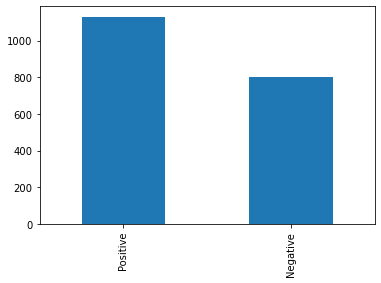

In [282]:
counts = rbdsq["RBD_STATUS"].value_counts()
counts.plot(kind = 'bar')
print(counts)

In [281]:
rbdsq.to_csv("rbdsq.csv")

In [280]:
max(rbdsq["RBDSQ"])

13

# Scales for Outcomes in Parkinson's disease – Autonomic (SCOPA‐AUT)

In [321]:
pd_scopa = pd.read_csv(path+"SCOPA-AUT.csv")
print(len(pd_scopa))
pd_scopa.head()

8229


,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,PTCGBOTH,SCAU1,SCAU2,SCAU3,...,SCAU26B,SCAU26BT,SCAU26C,SCAU26CT,SCAU26D,SCAU26DT,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,456173801,S,10874,BL,SCOPAAUT,09/2014,1.0,0.0,0.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,09/2014,2020-06-26 19:13:07.0,NaN,09/2014
1,511608101,S,10874,V02,SCOPAAUT,03/2015,1.0,0.0,0.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,03/2015,2020-06-26 19:13:22.0,NaN,03/2015
2,531596101,S,10874,V04,SCOPAAUT,08/2015,1.0,0.0,0.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,08/2015,2020-06-26 19:13:33.0,NaN,08/2015
3,585710601,S,10874,V06,SCOPAAUT,08/2016,1.0,0.0,0.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,08/2016,2020-06-26 19:13:57.0,NaN,08/2016
4,648650501,S,10874,V08,SCOPAAUT,08/2017,1.0,0.0,0.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,08/2017,2020-06-26 19:14:17.0,NaN,08/2017


In [322]:
patno_scopa = []
for i in range(len(pd_scopa)):
    if(pd_scopa["PATNO"][i] not in patno_scopa):
        patno_scopa.append(pd_scopa["PATNO"][i])

print("Number of Patients:", len(patno_scopa))

Number of Patients: 1481


In [323]:
print(list(pd_scopa.columns))
print(list(pd_scopa.columns)[7])
print(list(pd_scopa.columns)[33])

# skip cols 30 31

['REC_ID', 'F_STATUS', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'PTCGBOTH', 'SCAU1', 'SCAU2', 'SCAU3', 'SCAU4', 'SCAU5', 'SCAU6', 'SCAU7', 'SCAU8', 'SCAU9', 'SCAU10', 'SCAU11', 'SCAU12', 'SCAU13', 'SCAU14', 'SCAU15', 'SCAU16', 'SCAU17', 'SCAU18', 'SCAU19', 'SCAU20', 'SCAU21', 'SCAU22', 'SCAU23', 'SCAU23A', 'SCAU23AT', 'SCAU24', 'SCAU25', 'SCAU26A', 'SCAU26AT', 'SCAU26B', 'SCAU26BT', 'SCAU26C', 'SCAU26CT', 'SCAU26D', 'SCAU26DT', 'ORIG_ENTRY', 'LAST_UPDATE', 'QUERY', 'SITE_APRV']
SCAU1
SCAU25


In [324]:
# add 3 points for each response of “9.” for these columns
for col in ['SCAU1', 'SCAU2', 'SCAU3', 'SCAU4', 'SCAU5', 'SCAU6', 'SCAU7', 'SCAU8', 'SCAU9', 'SCAU10', 'SCAU11', 'SCAU12', 'SCAU13', 'SCAU14', 'SCAU15', 'SCAU16', 'SCAU17', 'SCAU18', 'SCAU19', 'SCAU20', 'SCAU21']:
    pd_scopa[col] = pd_scopa[col].replace(to_replace = 9, value = 3)
    
# add 0 points for each response of “9.” for these columns
for col in ['SCAU22', 'SCAU23', 'SCAU24', 'SCAU25']:
    pd_scopa[col] = pd_scopa[col].replace(to_replace = 9, value = 0)
    
pd_scopa.head()

,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,PTCGBOTH,SCAU1,SCAU2,SCAU3,...,SCAU26B,SCAU26BT,SCAU26C,SCAU26CT,SCAU26D,SCAU26DT,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,456173801,S,10874,BL,SCOPAAUT,09/2014,1.0,0.0,0.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,09/2014,2020-06-26 19:13:07.0,NaN,09/2014
1,511608101,S,10874,V02,SCOPAAUT,03/2015,1.0,0.0,0.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,03/2015,2020-06-26 19:13:22.0,NaN,03/2015
2,531596101,S,10874,V04,SCOPAAUT,08/2015,1.0,0.0,0.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,08/2015,2020-06-26 19:13:33.0,NaN,08/2015
3,585710601,S,10874,V06,SCOPAAUT,08/2016,1.0,0.0,0.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,08/2016,2020-06-26 19:13:57.0,NaN,08/2016
4,648650501,S,10874,V08,SCOPAAUT,08/2017,1.0,0.0,0.0,0.0,...,0.0,NaN,0.0,NaN,0.0,NaN,08/2017,2020-06-26 19:14:17.0,NaN,08/2017


In [328]:
lentot = len(patno_scopa)
len1 = len(pd_scopa)
columns = list(pd_scopa.columns)

scopa = pd.DataFrame(columns = ["PATNO","SCOPA_TOTAL","SCOPA_GASTRO","SCOPA_URINARY","SCOPA_CARDIO",
                                "SCOPA_THERMO","SCOPA_PUPIL","SCOPA_SEXUAL"])

for i in range(lentot):
    
    if(i%100 == 0):
        print(i)
    
    patno = patno_scopa[i]
    
    count1 = 0
    total1 = np.zeros(27)
    
    total = 0
    gastro = 0
    urinary = 0
    cardio = 0
    thermo = 0
    pupil = 0
    sexual = 0
        
    for j in range(len1):
        
        patnoj = pd_scopa["PATNO"][j]
        if(patnoj != patno):
            continue
            
        count1 +=1
        
        for x in range(len(columns)):
            
            if(x>=7 and x<=33 and x!=30 and x!=31):
                val = pd_scopa[columns[x]][j]
                if(pd.isna(val) == True):
                    val = 0
                else:
                    val = int(val)
                total1[x-7] += val
    
    total = np.sum(total1)/count1
    gastro = np.sum(total1[0:7])/count1
    urinary = np.sum(total1[7:13])/count1
    cardio = np.sum(total1[13:16])/count1
    thermo = (total1[16]+total1[17]+total1[19]+total1[20])/count1
    pupil = total1[18]/count1
    sexual = np.sum(total1[21:27])/count1
        
    tempdict = dict()
    tempdict["PATNO"] = patno
    tempdict["SCOPA_TOTAL"] = total 
    tempdict["SCOPA_GASTRO"] = gastro 
    tempdict["SCOPA_URINARY"] = urinary 
    tempdict["SCOPA_CARDIO"] = cardio 
    tempdict["SCOPA_THERMO"] = thermo 
    tempdict["SCOPA_PUPIL"] = pupil
    tempdict["SCOPA_SEXUAL"] = sexual
    
    
    scopa = scopa.append(tempdict, ignore_index = True)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400


In [329]:
print(len(scopa))
scopa.head()

1481


,PATNO,SCOPA_TOTAL,SCOPA_GASTRO,SCOPA_URINARY,SCOPA_CARDIO,SCOPA_THERMO,SCOPA_PUPIL,SCOPA_SEXUAL
0,10874.0,1.142857,0.000000,1.000000,0.000000,0.142857,0.00,0.000000
1,12224.0,8.125000,0.250000,2.500000,0.000000,0.250000,0.00,5.125000
2,12499.0,12.166667,3.833333,4.666667,1.166667,1.500000,0.50,0.500000
3,12593.0,8.000000,1.875000,4.000000,0.000000,0.125000,0.25,1.750000
4,13039.0,2.857143,0.000000,1.285714,0.000000,0.000000,0.00,1.571429


In [330]:
scopa.to_csv("scopa.csv")

# Semantic Fluency (SFT)

In [331]:
pd_sft = pd.read_csv(path+"Semantic_Fluency.csv")
print(len(pd_sft))
pd_sft.head()

6995


,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,VLTANIM,VLTVEG,VLTFRUIT,AGE_ASSESS_SFTANIM,DVS_SFTANIM,DVT_SFTANIM,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,233165501,S,3400,BL,SFT,07/2010,22,24.0,17.0,39,11,42,07/2010,2020-06-29 14:40:01.0,NaN,07/2010
1,232532101,S,3401,BL,SFT,07/2010,12,18.0,18.0,56,5,25,07/2010,2020-06-29 14:40:25.0,NaN,07/2010
2,234840401,S,3404,BL,SFT,07/2010,16,14.0,11.0,55,8,41,07/2010,2020-06-29 14:41:41.0,NaN,07/2010
3,231742501,S,3403,BL,SFT,07/2010,19,9.0,10.0,68,10,48,07/2010,2020-06-29 14:40:44.0,NaN,07/2010
4,236091601,S,3405,BL,SFT,07/2010,25,20.0,16.0,63,13,57,07/2010,2020-01-13 15:16:51.0,NaN,07/2010


In [332]:
patno_sft = []
for i in range(len(pd_sft)):
    if(pd_sft["PATNO"][i] not in patno_sft):
        patno_sft.append(pd_sft["PATNO"][i])

print("Number of Patients:", len(patno_sft))

Number of Patients: 1477


In [ ]:
Sum of VLTANIM, VLTVEG, VLTFRUIT

In [335]:
print(list(pd_sft.columns))
print(list(pd_sft.columns)[6])
print(list(pd_sft.columns)[8])

['REC_ID', 'F_STATUS', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'VLTANIM', 'VLTVEG', 'VLTFRUIT', 'AGE_ASSESS_SFTANIM', 'DVS_SFTANIM', 'DVT_SFTANIM', 'ORIG_ENTRY', 'LAST_UPDATE', 'QUERY', 'SITE_APRV']
VLTANIM
VLTFRUIT


In [336]:
lentot = len(patno_sft)
len1 = len(pd_sft)
columns = list(pd_sft.columns)

sft = pd.DataFrame(columns = ["PATNO", "SFT"])

for i in range(lentot):
    
    if(i%100 == 0):
        print(i)
    
    patno = patno_sft[i]
    
    count1 = 0
    total1 = np.zeros(3)
        
    for j in range(len1):
        
        patnoj = pd_sft["PATNO"][j]
        if(patnoj != patno):
            continue
            
        count1 +=1
        
        for x in range(len(columns)):
            
            if(x>=6 and x<=8):
                val = pd_sft[columns[x]][j]
                if(pd.isna(val) == True):
                    val = 0
                else:
                    val = int(val)
                total1[x-6] += val
    
    score = np.sum(total1)/count1
        
    tempdict = dict()
    tempdict["PATNO"] = patno
    tempdict["SFT"] = score
    
    sft = sft.append(tempdict, ignore_index = True)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400


In [337]:
print(len(sft))
sft.head()

1477


,PATNO,SFT
0,3400.0,49.400000
1,3401.0,49.888889
2,3404.0,38.111111
3,3403.0,30.000000
4,3405.0,61.000000


In [338]:
sft.to_csv("sft.csv")

# State Trait Anxiety Index (STAI)


In [347]:
pd_stai = pd.read_csv(path+"State-Trait_Anxiety_Inventory.csv")
print(len(pd_stai))
pd_stai.head()

8535


,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,STAIAD1,STAIAD2,STAIAD3,STAIAD4,...,STAIAD35,STAIAD36,STAIAD37,STAIAD38,STAIAD39,STAIAD40,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,408788101,S,10362,SC,STAI,08/2013,2.0,4.0,1.0,1.0,...,1.0,4.0,1.0,1.0,4.0,1.0,08/2013,2020-02-11 15:26:24.0,NaN,08/2013
1,605760301,S,10405,SC,STAI,09/2014,4.0,4.0,1.0,1.0,...,1.0,4.0,2.0,2.0,4.0,2.0,12/2016,2020-02-11 15:22:37.0,NaN,12/2016
2,411036201,S,10496,SC,STAI,06/2013,2.0,2.0,1.0,1.0,...,1.0,4.0,1.0,2.0,4.0,2.0,09/2013,2020-02-12 11:27:56.0,NaN,09/2013
3,409588401,S,10606,SC,STAI,08/2013,4.0,4.0,3.0,4.0,...,1.0,4.0,1.0,1.0,4.0,2.0,09/2013,2015-06-26 10:57:18.0,NaN,03/2015
4,448228701,S,10662,SC,STAI,06/2014,4.0,4.0,1.0,1.0,...,1.0,4.0,1.0,1.0,4.0,1.0,07/2014,2020-02-11 15:22:47.0,NaN,07/2014


In [348]:
patno_stai = []
for i in range(len(pd_stai)):
    if(pd_stai["PATNO"][i] not in patno_stai):
        patno_stai.append(pd_stai["PATNO"][i])

print("Number of Patients:", len(patno_stai))

Number of Patients: 1611


In [361]:
print(list(pd_stai.columns))
print(list(pd_stai.columns)[6])
print(list(pd_stai.columns)[45])

['REC_ID', 'F_STATUS', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'STAIAD1', 'STAIAD2', 'STAIAD3', 'STAIAD4', 'STAIAD5', 'STAIAD6', 'STAIAD7', 'STAIAD8', 'STAIAD9', 'STAIAD10', 'STAIAD11', 'STAIAD12', 'STAIAD13', 'STAIAD14', 'STAIAD15', 'STAIAD16', 'STAIAD17', 'STAIAD18', 'STAIAD19', 'STAIAD20', 'STAIAD21', 'STAIAD22', 'STAIAD23', 'STAIAD24', 'STAIAD25', 'STAIAD26', 'STAIAD27', 'STAIAD28', 'STAIAD29', 'STAIAD30', 'STAIAD31', 'STAIAD32', 'STAIAD33', 'STAIAD34', 'STAIAD35', 'STAIAD36', 'STAIAD37', 'STAIAD38', 'STAIAD39', 'STAIAD40', 'ORIG_ENTRY', 'LAST_UPDATE', 'QUERY', 'SITE_APRV']
STAIAD1
STAIAD40


In [360]:
# Use reverse scoring for the remaining questions:
set_total = set(np.arange(6, 46))
set1 = set()
for x in [3, 4, 6, 7, 9, 12, 13, 14, 17, 18, 22, 24, 25, 28, 29, 31, 32, 35, 37, 38, 40]:
    set1.add(x+5)
set_reverse = set_total - set1

for col in set_reverse:
    colname = pd_stai.columns[col]
    pd_stai[colname] = pd_stai[colname].replace({4:1, 3:2, 2:3, 1:4})

pd_stai.head()

,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,STAIAD1,STAIAD2,STAIAD3,STAIAD4,...,STAIAD35,STAIAD36,STAIAD37,STAIAD38,STAIAD39,STAIAD40,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,408788101,S,10362,SC,STAI,08/2013,3.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,08/2013,2020-02-11 15:26:24.0,NaN,08/2013
1,605760301,S,10405,SC,STAI,09/2014,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,2.0,1.0,2.0,12/2016,2020-02-11 15:22:37.0,NaN,12/2016
2,411036201,S,10496,SC,STAI,06/2013,3.0,3.0,1.0,1.0,...,1.0,1.0,1.0,2.0,1.0,2.0,09/2013,2020-02-12 11:27:56.0,NaN,09/2013
3,409588401,S,10606,SC,STAI,08/2013,1.0,1.0,3.0,4.0,...,1.0,1.0,1.0,1.0,1.0,2.0,09/2013,2015-06-26 10:57:18.0,NaN,03/2015
4,448228701,S,10662,SC,STAI,06/2014,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,07/2014,2020-02-11 15:22:47.0,NaN,07/2014


In [362]:
lentot = len(patno_stai)
len1 = len(pd_stai)
columns = list(pd_stai.columns)

stai = pd.DataFrame(columns = ["PATNO", "STAI"])

for i in range(lentot):
    
    if(i%100 == 0):
        print(i)
    
    patno = patno_stai[i]
    
    count1 = 0
    total1 = np.zeros(40)
        
    for j in range(len1):
        
        patnoj = pd_stai["PATNO"][j]
        if(patnoj != patno):
            continue
            
        count1 +=1
        
        for x in range(len(columns)):
            
            if(x>=6 and x<=45):
                val = pd_stai[columns[x]][j]
                if(pd.isna(val) == True):
                    val = 0
                else:
                    val = int(val)
                total1[x-6] += val
    
    score = np.sum(total1)/count1
        
    tempdict = dict()
    tempdict["PATNO"] = patno
    tempdict["STAI"] = score
    
    stai = stai.append(tempdict, ignore_index = True)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600


In [363]:
print(len(stai))
stai.head()

1611


,PATNO,STAI
0,10362.0,50.0
1,10405.0,46.0
2,10496.0,60.0
3,10606.0,57.0
4,10662.0,46.0


In [366]:
stai.to_csv("stai.csv")

# University of Pennsylvania Smell Identification Test UPSIT

In [367]:
pd_upsit = pd.read_csv(path+"University_of_Pennsylvania_Smell_ID_Test.csv")
print(len(pd_upsit))
pd_upsit.head()

2661


,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,UPSITBK1,UPSITBK2,UPSITBK3,UPSITBK4,NORMATIVE_SCORE,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,231754301,S,3403,BL,UPSIT,07/2010,4.0,2.0,1.0,2.0,Anosmia,07/2010,2020-06-29 14:40:44.0,NaN,07/2010
1,232551901,S,3401,BL,UPSIT,07/2010,9.0,9.0,5.0,4.0,Hyposmia,07/2010,2020-06-29 14:40:25.0,NaN,07/2010
2,233828501,S,3400,BL,UPSIT,07/2010,6.0,8.0,7.0,9.0,Hyposmia,07/2010,2020-06-29 14:40:01.0,NaN,07/2010
3,234847101,S,3404,BL,UPSIT,07/2010,8.0,6.0,9.0,10.0,Hyposmia,07/2010,2020-06-29 14:41:41.0,NaN,07/2010
4,236093901,S,3405,BL,UPSIT,07/2010,9.0,10.0,10.0,10.0,Normosmia,07/2010,2020-01-13 15:16:51.0,NaN,07/2010


In [368]:
patno_upsit = []
for i in range(len(pd_upsit)):
    if(pd_upsit["PATNO"][i] not in patno_upsit):
        patno_upsit.append(pd_upsit["PATNO"][i])

print("Number of Patients:", len(patno_upsit))

Number of Patients: 1910


In [372]:
print(list(pd_upsit.columns))
print(list(pd_upsit.columns)[6])
print(list(pd_upsit.columns)[9])

['REC_ID', 'F_STATUS', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'UPSITBK1', 'UPSITBK2', 'UPSITBK3', 'UPSITBK4', 'NORMATIVE_SCORE', 'ORIG_ENTRY', 'LAST_UPDATE', 'QUERY', 'SITE_APRV']
UPSITBK1
UPSITBK4


In [373]:
lentot = len(patno_upsit)
len1 = len(pd_upsit)
columns = list(pd_upsit.columns)

upsit = pd.DataFrame(columns = ["PATNO", "UPSIT"])

for i in range(lentot):
    
    if(i%100 == 0):
        print(i)
    
    patno = patno_upsit[i]
    
    count1 = 0
    total1 = np.zeros(4)
        
    for j in range(len1):
        
        patnoj = pd_upsit["PATNO"][j]
        if(patnoj != patno):
            continue
            
        count1 +=1
        
        for x in range(len(columns)):
            
            if(x>=6 and x<=9):
                val = pd_upsit[columns[x]][j]
                if(pd.isna(val) == True):
                    val = 0
                else:
                    val = int(val)
                total1[x-6] += val
    
    score = np.sum(total1)/count1
        
    tempdict = dict()
    tempdict["PATNO"] = patno
    tempdict["UPSIT"] = score
    
    upsit = upsit.append(tempdict, ignore_index = True)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


In [374]:
print(len(upsit))
upsit.head()

1910


,PATNO,UPSIT
0,3403.0,10.5
1,3401.0,22.5
2,3400.0,28.0
3,3404.0,31.0
4,3405.0,39.0


In [376]:
upsit.to_csv("upsit.csv")

# MOCA Total Score

In [26]:
pdmoca = pd.read_csv(path +"Montreal_Cognitive_Assessment__MoCA_.csv")
print(len(pdmoca))
pdmoca.head()

7860


,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,MCAALTTM,MCACUBE,MCACLCKC,MCACLCKN,...,MCAMONTH,MCAYR,MCADAY,MCAPLACE,MCACITY,MCATOT,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,226919901,S,3403,SC,MOCA,06/2010,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,25.0,06/2010,2020-06-29 14:40:45.0,NaN,07/2010
1,232509801,S,3401,SC,MOCA,07/2010,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,28.0,07/2010,2020-06-29 14:40:26.0,NaN,07/2010
2,232586001,S,3405,SC,MOCA,07/2010,1,0,1,1,...,1.0,1.0,1.0,1.0,1.0,29.0,07/2010,2020-01-13 15:16:52.0,NaN,07/2010
3,234494501,S,3406,SC,MOCA,07/2010,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,29.0,07/2010,2020-06-29 14:42:11.0,NaN,07/2010
4,226892001,S,3402,SC,MOCA,06/2010,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,30.0,06/2010,2020-06-29 14:49:46.0,NaN,06/2010


In [28]:
pdsocio = pd.read_csv(path +"Socio-Economics.csv")
print(len(pdsocio))
pdsocio.head()

2187


,REC_ID,F_STATUS,PATNO,EVENT_ID,PAG_NAME,INFODT,EDUCYRS,HANDED,ORIG_ENTRY,LAST_UPDATE,QUERY,SITE_APRV
0,408734501,S,10362,SC,SOCIOECO,08/2013,16.0,1.0,08/2013,2020-02-11 15:26:24.0,NaN,08/2013
1,605734901,S,10405,SC,SOCIOECO,09/2014,22.0,1.0,12/2016,2020-02-11 15:22:37.0,NaN,12/2016
2,404093001,S,10496,SC,SOCIOECO,06/2013,12.0,1.0,07/2013,2020-02-12 11:27:56.0,NaN,07/2013
3,409585901,S,10606,SC,SOCIOECO,08/2013,16.0,1.0,09/2013,2015-06-26 11:16:19.0,NaN,03/2015
4,448228901,S,10662,SC,SOCIOECO,06/2014,21.0,1.0,07/2014,2020-02-11 15:22:47.0,NaN,07/2014


In [31]:
patno_moca = []
for i in range(len(pdmoca)):
    if(pdmoca["PATNO"][i] not in patno_moca):
        patno_moca.append(pdmoca["PATNO"][i])

print("Number of Patients:", len(patno_moca))

patno_socio = []
for i in range(len(pdsocio)):
    if(pdsocio["PATNO"][i] not in patno_socio):
        patno_socio.append(pdsocio["PATNO"][i])

print("Number of Patients:", len(patno_socio))

patno_mocasocio = []

for i in patno_socio:
    if(i not in patno_moca):
        print("Patient Number Present in File 2 but not in File 1:", i)
    else:
        patno_mocasocio.append(i)

for i in patno_moca:
    if(i not in patno_socio):
        print("Patient Number Present in File 1 but not in File 2:", i)

print("Number of Common Patients in Both Files:", len(patno_mocasocio))

Number of Patients: 2177
Number of Patients: 2184
Patient Number Present in File 2 but not in File 1: 11613
Patient Number Present in File 2 but not in File 1: 3005
Patient Number Present in File 2 but not in File 1: 3065
Patient Number Present in File 2 but not in File 1: 3412
Patient Number Present in File 2 but not in File 1: 3568
Patient Number Present in File 2 but not in File 1: 40803
Patient Number Present in File 2 but not in File 1: 42142
Patient Number Present in File 2 but not in File 1: 74312
Patient Number Present in File 1 but not in File 2: 3382
Number of Common Patients in Both Files: 2176


In [35]:
lentot = len(patno_mocasocio)
len1 = len(pdmoca)
len2 = len(pdsocio)

moca = pd.DataFrame(columns = ["PATNO", "Unadjusted_MOCA", "Socio_Score", "MOCA"])

for i in range(lentot):
    
    if(i%100 == 0):
        print(i)
    
    patno = patno_mocasocio[i]
    
    count1 = 0
    total1 = 0
        
    for j in range(len1):
        
        patnoj = pdmoca["PATNO"][j]
        if(patnoj != patno):
            continue
            
        count1 +=1
        
        val = pdmoca["MCATOT"][j]
        if(pd.isna(val) == True):
            val = 0
        else:
            val = int(val)
        total1 += val
        
    count2 = 0
    total2 = 0
    
    for j in range(len2):
        
        patnoj = pdsocio["PATNO"][j]
        if(patnoj != patno):
            continue
            
        count2 +=1
        
        val = pdsocio["EDUCYRS"][j]
        if(pd.isna(val) == True):
            val = 0
        else:
            val = int(val)
        total2 += val
        
    unadjusted_moca = total1/count1
    socio_score = total2/count2
    
    if(socio_score <=12 and unadjusted_moca < 30):
        moca_score = unadjusted_moca + 1
    else:
        moca_score = unadjusted_moca
        
    tempdict = dict()
    tempdict["PATNO"] = patno
    tempdict["Unadjusted_MOCA"] = unadjusted_moca
    tempdict["Socio_Score"] = socio_score
    tempdict["MOCA"] = moca_score
    
    moca = moca.append(tempdict, ignore_index = True)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100


In [36]:
moca.head()

,PATNO,Unadjusted_MOCA,Socio_Score,MOCA
0,10362.0,28.0,16.0,28.0
1,10405.0,23.0,22.0,23.0
2,10496.0,30.0,12.0,30.0
3,10606.0,25.0,16.0,25.0
4,10662.0,29.0,21.0,29.0


In [37]:
moca.to_csv("moca.csv")

# ==================== MASTER DATABASE ====================  

In [5]:
load_path = "./Clinical_CSVs/"

In [6]:
# Integrating all Clinical DBs

fam_history = pd.read_csv(load_path+"fam_history.csv").iloc[:,1:]
randomization = pd.read_csv(load_path+"randomization.csv").iloc[:,1:]
screening_demo = pd.read_csv(load_path+"screening_demo.csv").iloc[:,1:]
mds_updrs1 = pd.read_csv(load_path+"mds_updrs1.csv").iloc[:,1:]
mds_updrs2 = pd.read_csv(load_path+"mds_updrs2.csv").iloc[:,1:]
mds_updrs3 = pd.read_csv(load_path+"mds_updrs3.csv").iloc[:,1:]
mds_updrs4 = pd.read_csv(load_path+"mds_updrs4.csv").iloc[:,1:]
moca = pd.read_csv(load_path+"moca.csv").iloc[:,1:]
td_pigd = pd.read_csv(load_path+"td_pigd.csv").iloc[:,1:]
bjlo = pd.read_csv(load_path+"bjlo.csv").iloc[:,1:]
ess = pd.read_csv(load_path+"ess.csv").iloc[:,1:]
gds = pd.read_csv(load_path+"gds.csv").iloc[:,1:]
hvlt = pd.read_csv(load_path+"hvlt.csv").iloc[:,1:]
lns = pd.read_csv(load_path+"lns.csv").iloc[:,1:]
quip = pd.read_csv(load_path+"quip.csv").iloc[:,1:]
rbdsq = pd.read_csv(load_path+"rbdsq.csv").iloc[:,1:]
scopa = pd.read_csv(load_path+"scopa.csv").iloc[:,1:]
sft = pd.read_csv(load_path+"sft.csv").iloc[:,1:]
stai = pd.read_csv(load_path+"stai.csv").iloc[:,1:]
upsit = pd.read_csv(load_path+"upsit.csv").iloc[:,1:]

In [9]:
dfs = [screening_demo, mds_updrs1, mds_updrs2, mds_updrs3, mds_updrs4, 
       moca, td_pigd, bjlo, ess, gds, hvlt, lns, quip, rbdsq, scopa, 
       sft, stai, upsit]
print(len(dfs))

clinical_df = pd.merge(left = fam_history, 
                          right = randomization, 
                          left_on = 'PATNO', 
                          right_on = 'PATNO')
print(len(clinical_df))

18
1907


In [10]:
for i in range(len(dfs)):
    clinical_df = pd.merge(left = clinical_df,
                           right = dfs[i],
                           left_on = 'PATNO', 
                           right_on = 'PATNO')

In [11]:
print(len(clinical_df))
clinical_df.head()

761


,PATNO,First_Fam_Num,First_Fam_PD,Other_Fam_Num,Other_Fam_PD,GENDER,ENROLLDT,AGE,HISPLAT,RAINDALS,...,SCOPA_TOTAL,SCOPA_GASTRO,SCOPA_URINARY,SCOPA_CARDIO,SCOPA_THERMO,SCOPA_PUPIL,SCOPA_SEXUAL,SFT,STAI,UPSIT
0,14426.0,11.0,1.0,15.0,1.0,1,02/2014,60,0.0,0.0,...,5.500000,2.000000,1.500000,0.166667,1.333333,0.166667,0.333333,29.000,61.833333,17.0
1,18502.0,8.0,0.0,9.0,0.0,1,03/2015,61,0.0,0.0,...,9.250000,0.250000,5.250000,0.000000,2.500000,0.000000,1.250000,54.000,60.500000,16.0
2,3001.0,6.0,0.0,15.5,0.0,1,03/2011,65,0.0,0.0,...,15.444444,2.555556,6.888889,0.555556,1.000000,0.111111,4.333333,46.875,61.666667,21.0
3,3002.0,6.0,0.0,16.0,0.0,0,03/2011,67,0.0,0.0,...,24.555556,8.111111,7.777778,0.222222,4.666667,2.555556,1.222222,46.125,79.222222,14.5
4,3003.0,4.0,0.0,6.0,0.0,0,04/2011,56,0.0,0.0,...,15.555556,2.666667,9.888889,1.777778,0.888889,0.222222,0.111111,46.875,47.111111,18.5


In [14]:
# Adding Patient status to the Master DB
pat_status = pd.read_csv(path+"Patient_Status.csv")
pat_status.head()

,PATNO,RECRUITMENT_CAT,IMAGING_CAT,ENROLL_DATE,ENROLL_CAT,ENROLL_STATUS,DESCRP_CAT,STATUS_DATE
0,10362,PRODROMA,PRODROMA,NaN,NaN,Excluded,HYP,08/2013
1,10405,PRODROMA,PRODROMA,NaN,NaN,Excluded,HYP,09/2014
2,10496,PRODROMA,PRODROMA,NaN,NaN,Excluded,HYP,06/2013
3,10606,PRODROMA,no image,NaN,NaN,Declined,HYP,08/2013
4,10662,PRODROMA,PRODROMA,NaN,NaN,Excluded,HYP,06/2014


In [15]:
pat_status = pat_status[(pat_status['RECRUITMENT_CAT'] == 'HC') | (pat_status['RECRUITMENT_CAT'] == 'PD')].iloc[:,0:2]
pat_status.head()

,PATNO,RECRUITMENT_CAT
85,3000,HC
86,3001,PD
87,3002,PD
88,3003,PD
89,3004,HC


In [16]:
clinical_df = pd.merge(left = clinical_df, 
                          right = pat_status, 
                          left_on = 'PATNO',
                          right_on = 'PATNO')

print(len(clinical_df))
clinical_df.head()

435


,PATNO,First_Fam_Num,First_Fam_PD,Other_Fam_Num,Other_Fam_PD,GENDER,ENROLLDT,AGE,HISPLAT,RAINDALS,...,SCOPA_GASTRO,SCOPA_URINARY,SCOPA_CARDIO,SCOPA_THERMO,SCOPA_PUPIL,SCOPA_SEXUAL,SFT,STAI,UPSIT,RECRUITMENT_CAT
0,3001.0,6.0,0.0,15.5,0.0,1,03/2011,65,0.0,0.0,...,2.555556,6.888889,0.555556,1.000000,0.111111,4.333333,46.875,61.666667,21.0,PD
1,3002.0,6.0,0.0,16.0,0.0,0,03/2011,67,0.0,0.0,...,8.111111,7.777778,0.222222,4.666667,2.555556,1.222222,46.125,79.222222,14.5,PD
2,3003.0,4.0,0.0,6.0,0.0,0,04/2011,56,0.0,0.0,...,2.666667,9.888889,1.777778,0.888889,0.222222,0.111111,46.875,47.111111,18.5,PD
3,3006.0,9.0,0.0,7.0,0.0,0,05/2011,57,0.0,0.0,...,1.000000,3.333333,0.000000,3.333333,0.000000,2.000000,64.000,45.000000,13.0,PD
4,3010.0,7.5,0.0,11.5,1.0,1,06/2011,47,0.0,0.0,...,4.222222,3.888889,0.333333,4.000000,0.111111,0.555556,38.875,78.222222,10.0,PD


In [17]:
clinical_df['RECRUITMENT_CAT'] = clinical_df['RECRUITMENT_CAT'].replace(to_replace = 'PD', value = 1)
clinical_df['RECRUITMENT_CAT'] = clinical_df['RECRUITMENT_CAT'].replace(to_replace = 'HC', value = 0)

clinical_df = clinical_df.rename(columns={'RECRUITMENT_CAT': 'STATUS'})

print(len(clinical_df))
clinical_df.head()

435


,PATNO,First_Fam_Num,First_Fam_PD,Other_Fam_Num,Other_Fam_PD,GENDER,ENROLLDT,AGE,HISPLAT,RAINDALS,...,SCOPA_GASTRO,SCOPA_URINARY,SCOPA_CARDIO,SCOPA_THERMO,SCOPA_PUPIL,SCOPA_SEXUAL,SFT,STAI,UPSIT,STATUS
0,3001.0,6.0,0.0,15.5,0.0,1,03/2011,65,0.0,0.0,...,2.555556,6.888889,0.555556,1.000000,0.111111,4.333333,46.875,61.666667,21.0,1
1,3002.0,6.0,0.0,16.0,0.0,0,03/2011,67,0.0,0.0,...,8.111111,7.777778,0.222222,4.666667,2.555556,1.222222,46.125,79.222222,14.5,1
2,3003.0,4.0,0.0,6.0,0.0,0,04/2011,56,0.0,0.0,...,2.666667,9.888889,1.777778,0.888889,0.222222,0.111111,46.875,47.111111,18.5,1
3,3006.0,9.0,0.0,7.0,0.0,0,05/2011,57,0.0,0.0,...,1.000000,3.333333,0.000000,3.333333,0.000000,2.000000,64.000,45.000000,13.0,1
4,3010.0,7.5,0.0,11.5,1.0,1,06/2011,47,0.0,0.0,...,4.222222,3.888889,0.333333,4.000000,0.111111,0.555556,38.875,78.222222,10.0,1


1    416
0     19
Name: STATUS, dtype: int64


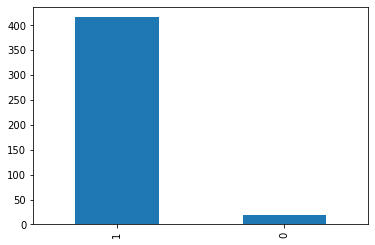

In [19]:
counts = clinical_df['STATUS'].value_counts()
counts.plot(kind = 'bar')
print(counts)

In [20]:
clinical_df.to_csv(load_path + "clinical_masterDB.csv", index = False)

In [21]:
pd.read_csv(load_path + "clinical_masterDB.csv").head()

,PATNO,First_Fam_Num,First_Fam_PD,Other_Fam_Num,Other_Fam_PD,GENDER,ENROLLDT,AGE,HISPLAT,RAINDALS,...,SCOPA_GASTRO,SCOPA_URINARY,SCOPA_CARDIO,SCOPA_THERMO,SCOPA_PUPIL,SCOPA_SEXUAL,SFT,STAI,UPSIT,STATUS
0,3001.0,6.0,0.0,15.5,0.0,1,03/2011,65,0.0,0.0,...,2.555556,6.888889,0.555556,1.000000,0.111111,4.333333,46.875,61.666667,21.0,1
1,3002.0,6.0,0.0,16.0,0.0,0,03/2011,67,0.0,0.0,...,8.111111,7.777778,0.222222,4.666667,2.555556,1.222222,46.125,79.222222,14.5,1
2,3003.0,4.0,0.0,6.0,0.0,0,04/2011,56,0.0,0.0,...,2.666667,9.888889,1.777778,0.888889,0.222222,0.111111,46.875,47.111111,18.5,1
3,3006.0,9.0,0.0,7.0,0.0,0,05/2011,57,0.0,0.0,...,1.000000,3.333333,0.000000,3.333333,0.000000,2.000000,64.000,45.000000,13.0,1
4,3010.0,7.5,0.0,11.5,1.0,1,06/2011,47,0.0,0.0,...,4.222222,3.888889,0.333333,4.000000,0.111111,0.555556,38.875,78.222222,10.0,1
